# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Чтобы обеспечить воспроизводимость результатов - случайные числа будут одинаковыми при разных запусках, а не каждый раз новыми ")

Чтобы обеспечить воспроизводимость результатов - случайные числа будут одинаковыми при разных запусках, а не каждый раз новыми 


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [4]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [5]:
df_test.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [6]:
df_test.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [7]:
df_train.describe(include="all")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [8]:
df_test.describe(include="all")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [9]:
df_train.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

В тренировочном датасете пропуски есть в колонках 'mileage', 'engine', 'max_power', 'torque', 'seats'.

In [10]:
df_test.isnull().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

В тестовом датасете пропуски есть в колонках 'mileage', 'engine', 'max_power', 'torque', 'seats'.

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [11]:
df_train.drop("selling_price", axis=1).duplicated().sum()

1159

In [12]:
df_test.drop("selling_price", axis=1).duplicated().sum()

69

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [13]:
cl=['name', 'year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats']

In [14]:
df_train[df_train.duplicated(subset=cl)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [15]:
df_test[df_test.duplicated(subset=cl)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
200,Maruti Swift AMT VVT VXI,2019,650000,5621,Petrol,Trustmark Dealer,Automatic,First Owner,22.0 kmpl,1197 CC,81.80 bhp,113Nm@ 4200rpm,5.0
221,Volkswagen Vento 1.5 Highline Plus AT 16 Alloy,2018,885000,75000,Diesel,Individual,Automatic,First Owner,21.5 kmpl,1498 CC,108.5 bhp,250Nm@ 1500-3000rpm,5.0
235,Hyundai Grand i10 1.2 CRDi Sportz,2017,450000,56290,Diesel,Dealer,Manual,First Owner,24.0 kmpl,1186 CC,73.97 bhp,190.24nm@ 1750-2250rpm,5.0
238,Toyota Camry 2.5 Hybrid,2016,2000000,68089,Petrol,Trustmark Dealer,Automatic,First Owner,19.16 kmpl,2494 CC,157.7 bhp,213Nm@ 4500rpm,5.0
253,Tata Safari Storme EX,2015,503000,110000,Diesel,Individual,Manual,First Owner,14.1 kmpl,2179 CC,147.94 bhp,320Nm@ 1500-3000rpm,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,Mercedes-Benz S-Class S 350 CDI,2017,6000000,37000,Diesel,Dealer,Automatic,First Owner,13.5 kmpl,2987 CC,254.79 bhp,620Nm@ 1600-2400rpm,5.0
936,BMW X4 M Sport X xDrive20d,2019,5500000,8500,Diesel,Dealer,Automatic,First Owner,16.78 kmpl,1995 CC,190 bhp,400Nm@ 1750-2500rpm,5.0
949,Toyota Camry 2.5 Hybrid,2016,2000000,68089,Petrol,Trustmark Dealer,Automatic,First Owner,19.16 kmpl,2494 CC,157.7 bhp,213Nm@ 4500rpm,5.0
971,Maruti Ertiga SHVS ZDI Plus,2017,750000,50000,Diesel,Individual,Manual,First Owner,24.52 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,7.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [16]:
df_train=df_train.drop_duplicates(subset=cl,keep='first')

In [17]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [18]:
df_train=df_train.reset_index().drop("index",axis=1)
df_test=df_test.reset_index().drop("index",axis=1)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [19]:
df_train.drop("torque",axis=1, inplace=True)

In [20]:
df_test.drop("torque",axis=1, inplace=True)

Посмотрим единицы измерения для указанных столбцов:

In [21]:
df_train['mileage'].str[-5:].value_counts()

 kmpl    5577
km/kg      77
Name: mileage, dtype: int64

In [22]:
df_train['engine'].str[-3:].value_counts()

 CC    5654
Name: engine, dtype: int64

In [23]:
df_train['max_power'].str[-4:].value_counts()

 bhp    5654
0          3
Name: max_power, dtype: int64

In [24]:
df_test['mileage'].str[-5:].value_counts()

 kmpl    972
km/kg      9
Name: mileage, dtype: int64

In [25]:
df_test['engine'].str[-3:].value_counts()

 CC    981
Name: engine, dtype: int64

In [26]:
df_test['max_power'].str[-5:].value_counts()

0 bhp    138
3 bhp    129
5 bhp    117
4 bhp    108
2 bhp     99
7 bhp     92
6 bhp     92
1 bhp     77
8 bhp     73
9 bhp     56
Name: max_power, dtype: int64

В столбце engine в единицах измерения только CC, поэтому можем сразу убирать "СС". Также в тесте в столбце "max_power" можем сразу убрать единицы измерения

In [27]:
df_train['engine']=df_train['engine'].str[:-3].str.strip()
df_test['engine']=df_test['engine'].str[:-3].str.strip()

df_test['max_power']=df_test['max_power'].str[:-4].str.strip()

In [28]:
df_train['engine']=df_train['engine'].astype(float)
df_test['engine']=df_test['engine'].astype(float)

df_test['max_power']=df_test['max_power'].astype(float)

Переведем km/kg в kmpl

In [29]:
df_train['mileage_clear']=np.where(df_train['mileage'].str[-5:]=="km/kg","km/kg","kmpl")
df_train['mileage']=df_train['mileage'].str[:-5].str.strip()
df_train['mileage']=df_train['mileage'].astype(float)
df_train['mileage']=np.where(df_train['mileage_clear']=="km/kg",df_train['mileage']*9.8, df_train['mileage'])
df_train.drop("mileage_clear", axis=1, inplace=True)

In [30]:
df_test['mileage_clear']=np.where(df_test['mileage'].str[-5:]=="km/kg","km/kg","kmpl")
df_test['mileage']=df_test['mileage'].str[:-5].str.strip()
df_test['mileage']=df_test['mileage'].astype(float)
df_test['mileage']=np.where(df_test['mileage_clear']=="km/kg",df_test['mileage']*9.8, df_test['mileage'])
df_test.drop("mileage_clear", axis=1, inplace=True)

Обработаем столбец "max_power" в тренировочном датасете.

In [31]:
df_train['max_power_clear']=np.where(df_train['max_power'].str[-1:]=="0",0,df_train['max_power'].str[:-4].str.strip())
df_train['max_power_clear']=np.where(df_train['max_power']==' bhp',0,df_train['max_power_clear'])
df_train['max_power']=df_train['max_power_clear']
df_train.drop("max_power_clear",axis=1, inplace=True)
df_train['max_power']=df_train['max_power'].astype(float)

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [32]:
df_train.fillna(df_train.median(), inplace=True)
df_test.fillna(df_train.median(), inplace=True)


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [33]:
df_train['seats'].value_counts()

5.0     4618
7.0      800
8.0      191
4.0       94
9.0       68
6.0       48
10.0      18
2.0        2
14.0       1
Name: seats, dtype: int64

In [34]:
df_test['seats'].value_counts()

5.0    777
7.0    161
4.0     24
8.0     23
6.0      8
9.0      7
Name: seats, dtype: int64

In [35]:
print("Так как в переменной seats количество уникальных значений небольшое, возможно, лучше сделать её категариальной")

Так как в переменной seats количество уникальных значений небольшое, возможно, лучше сделать её категариальной


In [36]:
df_train['engine']=df_train['engine'].astype(int)
df_train['seats']=df_train['seats'].astype(int)

df_test['engine']=df_test['engine'].astype(int)
df_test['seats']=df_test['seats'].astype(int)

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

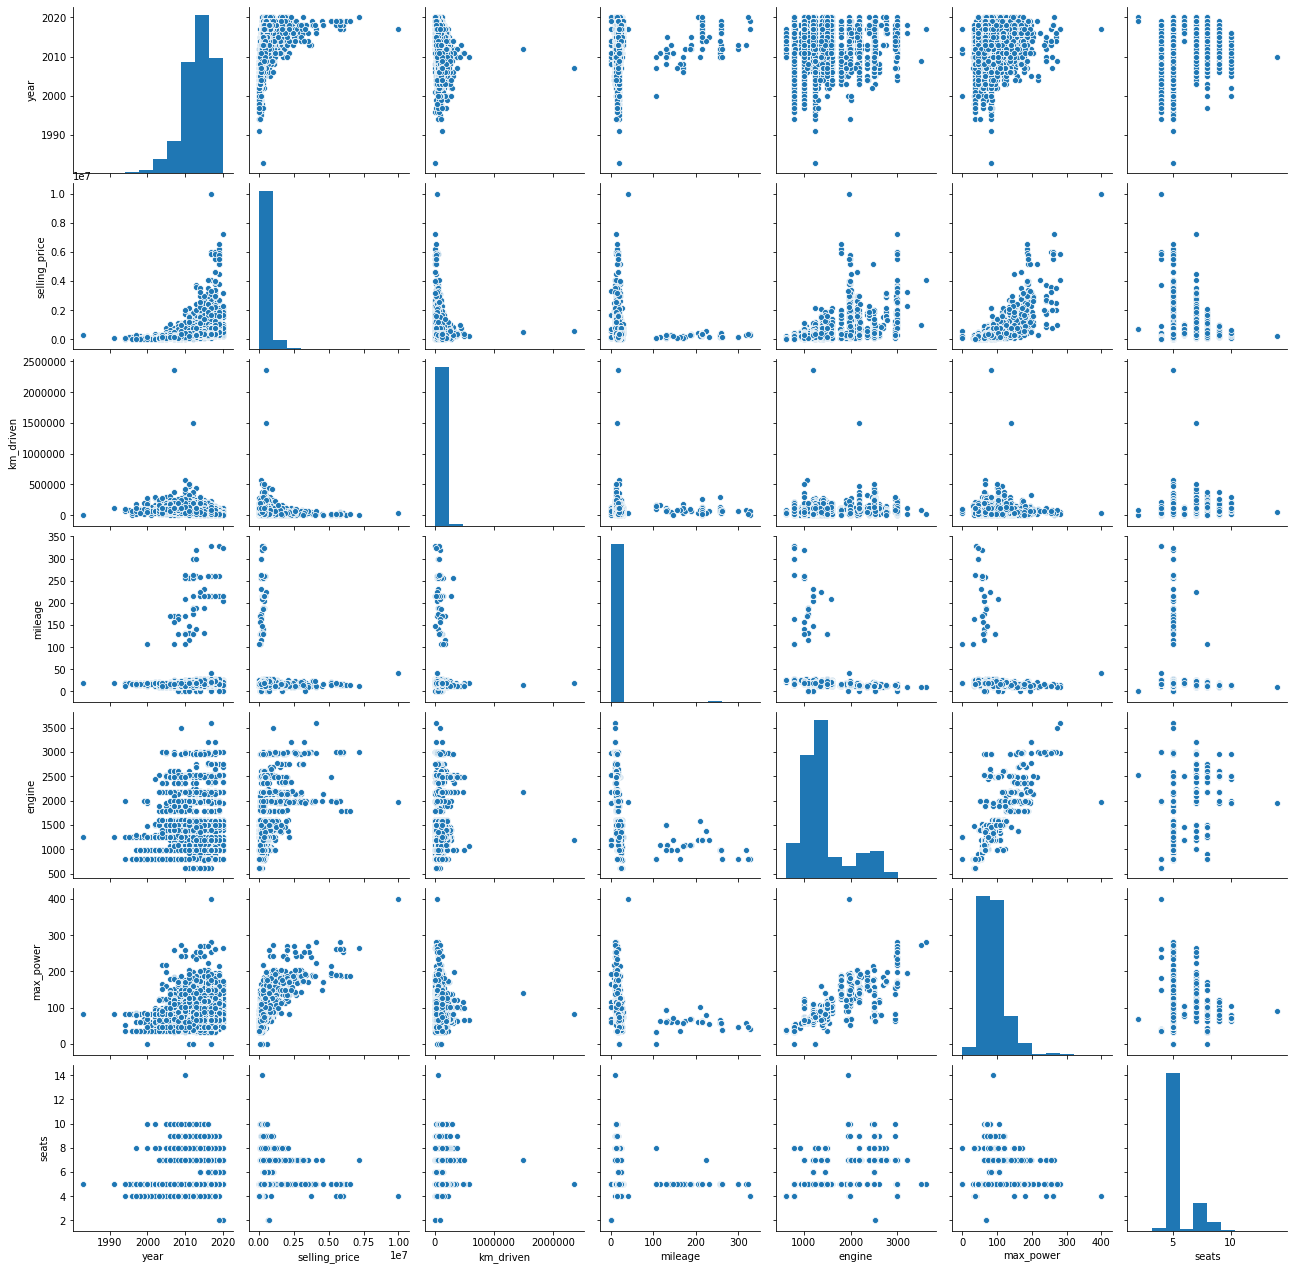

In [37]:
sns.pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

Некоторые признаки больше скоррелированы с целевой переменной, чем другие: например, чем больше значение признаков year, engine и max_power, тем большее значение может принимать целевая переменная. А km_driven исходя из тренировочного датасета не очень сильно влияет на целевую переменную.

Сильно скоррелированных признаков нет. Наиболее скоррелированными являются engine и max_power

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

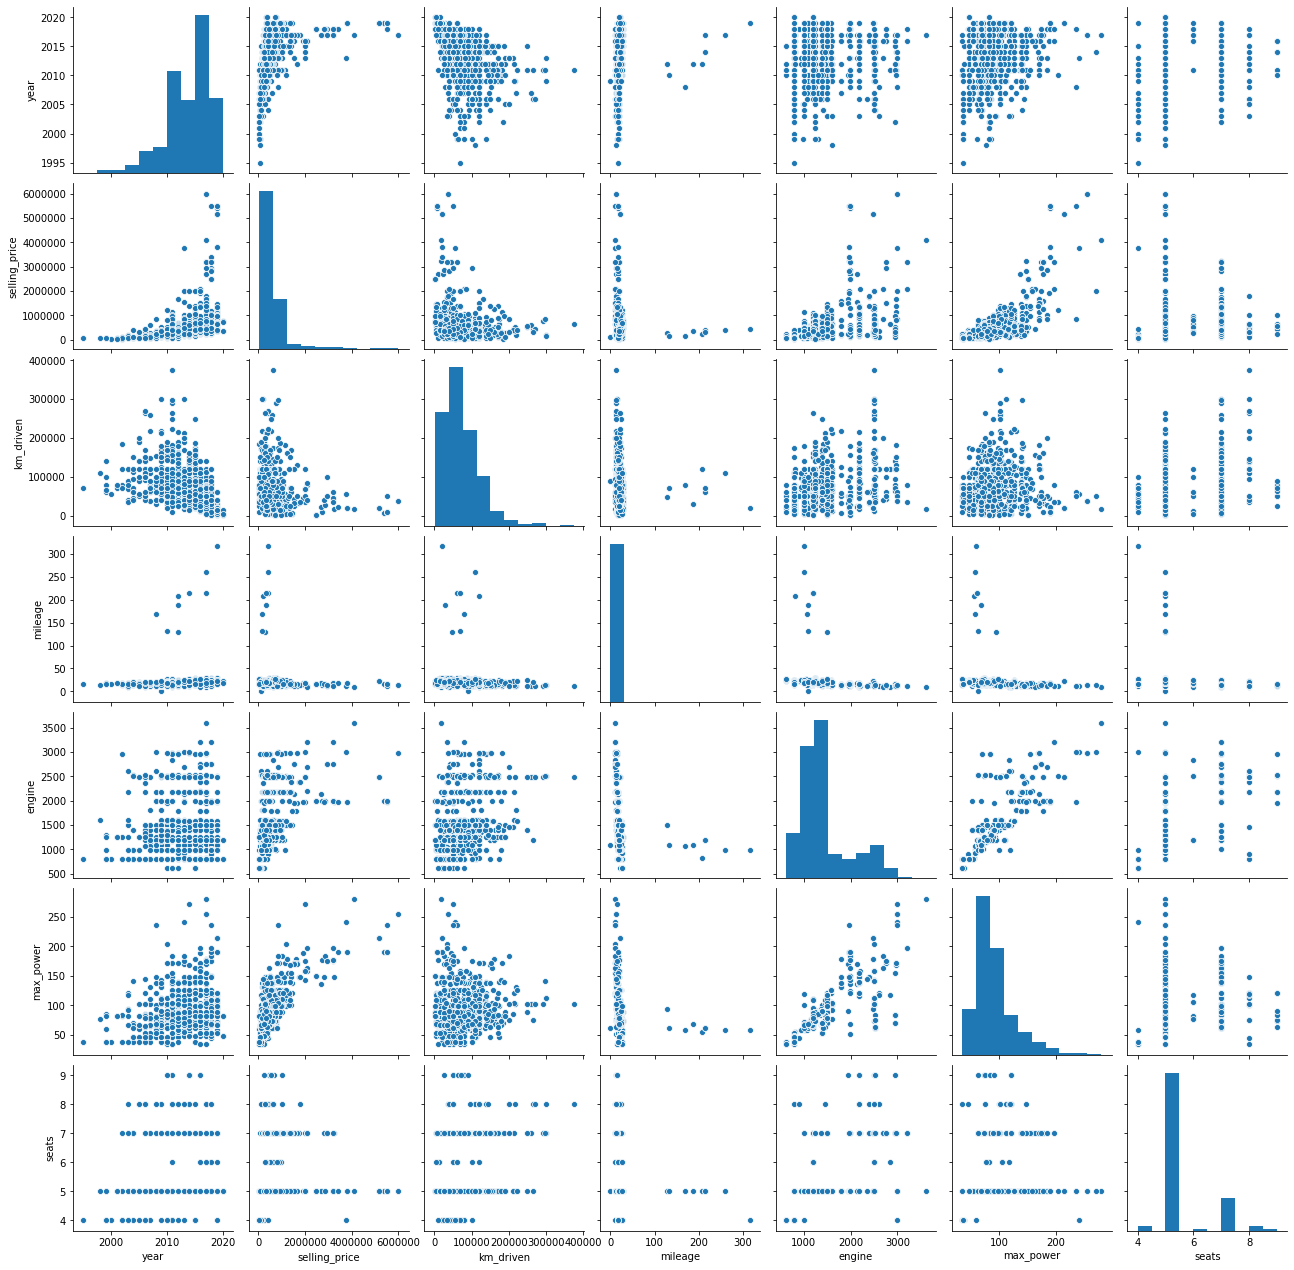

In [38]:
sns.pairplot(df_test)

В целом совокупности похожи, но есть отличия

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

In [39]:
numeric_col=['year','selling_price','km_driven','mileage','engine','max_power','seats']

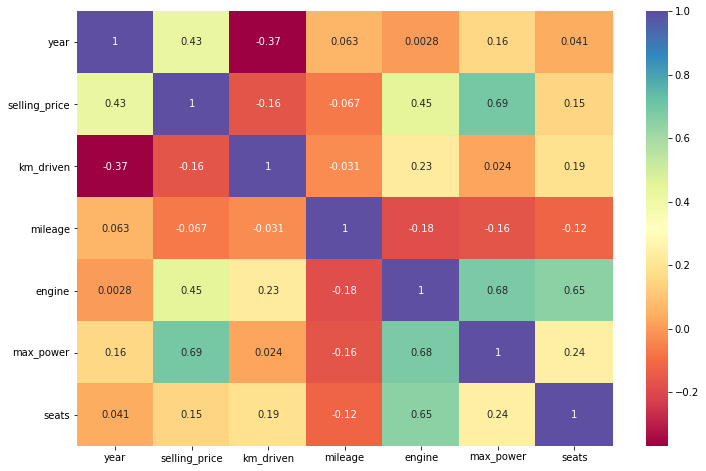

In [40]:
plt.figure(figsize = (12,8))
sns.heatmap(df_train.corr(), cmap="Spectral", annot= True)

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

* Наименее скоррелированы между собой engine и year (коэф.корр.=0,0028)
* Довольно сильная положительная линейная зависимость наблюдается между engine и max_power, engine и seats, selling_price и max_power
* km_driven и year имеют отрицательную корреляцию, значит чем меньше год, тем скорее всего больше км проехала машина

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

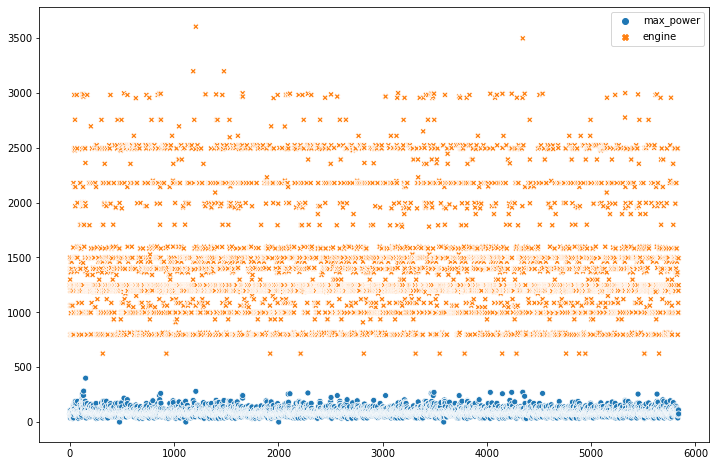

In [41]:
plt.figure(figsize = (12,8))
sns.scatterplot(data=df_train[['max_power','engine']])

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

Проверим наличие выбросов:

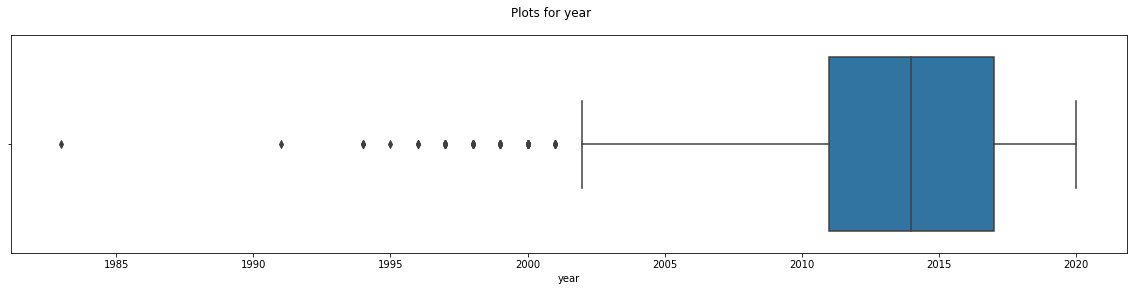

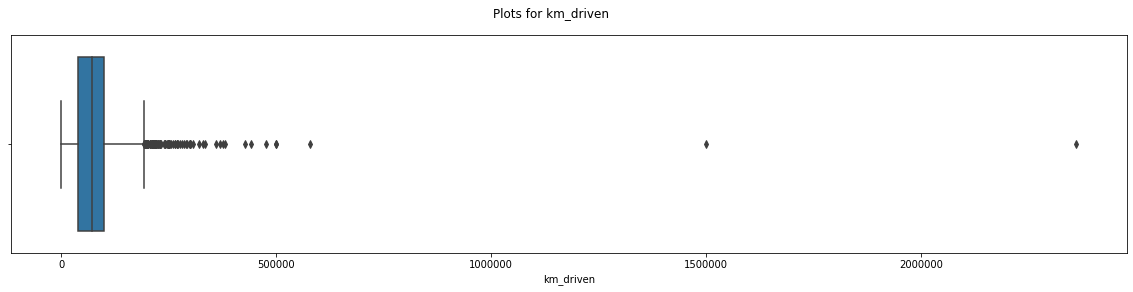

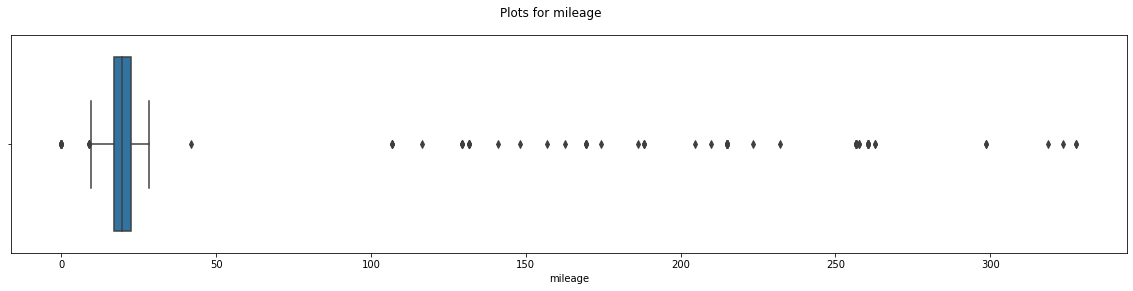

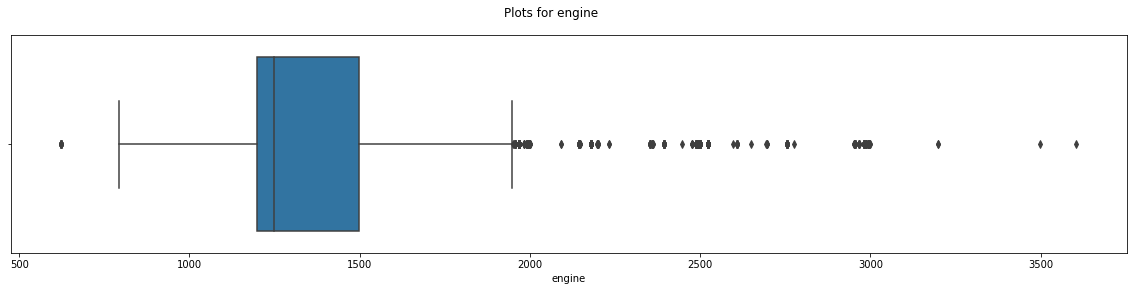

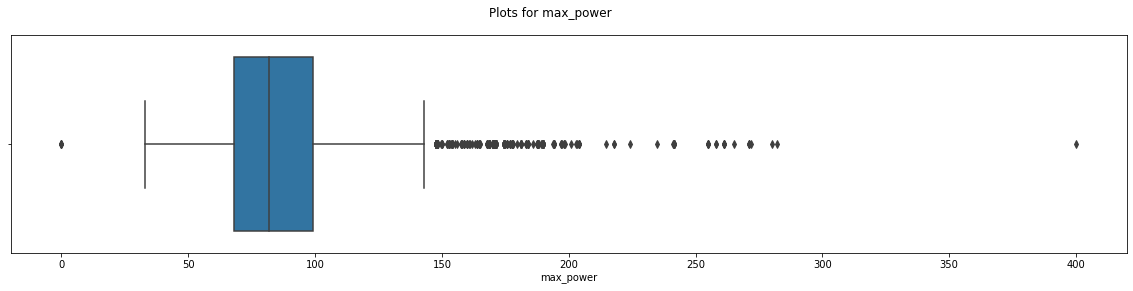

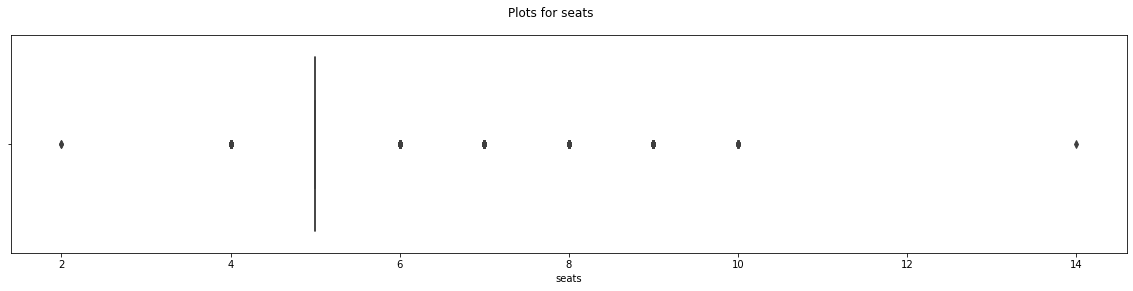

In [42]:
for col in df_train.drop("selling_price", axis=1).select_dtypes(include='number').columns.tolist():  
    fig, ax2  =  plt.subplots(figsize = (20,4))
    fig.suptitle('Plots for {}'.format(col))
    
    # ящик с усами
    sns.boxplot(x = col , data = df_train.drop("selling_price",axis=1),ax = ax2)

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [43]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   int32  
 10  max_power      5840 non-null   float64
 11  seats          5840 non-null   int32  
dtypes: float64(2), int32(2), int64(3), object(5)
memory usage: 502.0+ KB


In [44]:
y_train = df_train['selling_price']
X_train = df_train[numeric_col].drop('selling_price', axis=1)

In [45]:
assert X_train.shape == (5840, 6)

In [46]:
y_test = df_test['selling_price']
X_test = df_test[numeric_col].drop('selling_price', axis=1)

In [47]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

LR=LinearRegression().fit(X_train, y_train)
y_train_pred=LR.predict(X_train)
y_test_pred=LR.predict(X_test)

print("R2 train = ",r2_score(y_train, y_train_pred))
print("R2 test  = ",r2_score(y_test, y_test_pred))
print()
print("MSE train = ",MSE(y_train, y_train_pred))
print("MSE test  = ",MSE(y_test, y_test_pred))

R2 train =  0.5903758433195467
R2 test  =  0.5935938053177601

MSE train =  117413987622.1357
MSE test  =  233613885891.70837


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [49]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train_scal=scaler.fit_transform(X_train, y_train)
X_test_scal=scaler.transform(X_test)

In [50]:
LR_scal=LinearRegression().fit(X_train_scal, y_train)
y_train_pred_scal=LR_scal.predict(X_train_scal)
y_test_pred_scal=LR_scal.predict(X_test_scal)

print("R2 train = ",r2_score(y_train, y_train_pred_scal))
print("R2 test  = ",r2_score(y_test, y_test_pred_scal))
print()
print("MSE train = ",MSE(y_train, y_train_pred_scal))
print("MSE test  = ",MSE(y_test, y_test_pred_scal))

R2 train =  0.5903758433195476
R2 test  =  0.5935938053177723

MSE train =  117413987622.13545
MSE test  =  233613885891.7014


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [51]:
print("Max_power")

Max_power


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [52]:
from sklearn.linear_model import Lasso

Las=Lasso()

Las.fit(X_train_scal,y_train)

y_train_las_pred=Las.predict(X_train_scal)
y_test_las_pred=Las.predict(X_test_scal)
# your code here

print("R2 train = ",r2_score(y_train, y_train_las_pred))
print("R2 test  = ",r2_score(y_test, y_test_las_pred))
print()
print("MSE train = ",MSE(y_train, y_train_las_pred))
print("MSE test  = ",MSE(y_test, y_test_las_pred))

R2 train =  0.5903758433054549
R2 test  =  0.5935929721234758

MSE train =  117413987626.17496
MSE test  =  233614364835.57535


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [53]:
Las.coef_

array([163105.19327692, -41918.84488524,  10202.47637036,  51424.62361845,
       319571.29910783, -28246.03101363])

In [54]:
print("L1-регуляризация с параметрами по умолчанию никакие веса не занулила")

L1-регуляризация с параметрами по умолчанию никакие веса не занулила


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [55]:
from sklearn.model_selection import GridSearchCV

lasso_params = {'alpha':[0.02, 0.1, 0.2, 0.5, 0.6, 1.0, 2, 5, 10, 100, 1000,10000]}


In [56]:
grid=GridSearchCV(Lasso(), param_grid=lasso_params, cv=10, scoring="r2", verbose=3)

grid.fit(X_train_scal, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10] END .......................alpha=0.02;, score=0.560 total time=   0.0s
[CV 2/10] END .......................alpha=0.02;, score=0.588 total time=   0.0s
[CV 3/10] END .......................alpha=0.02;, score=0.645 total time=   0.0s
[CV 4/10] END .......................alpha=0.02;, score=0.587 total time=   0.0s
[CV 5/10] END .......................alpha=0.02;, score=0.435 total time=   0.0s
[CV 6/10] END .......................alpha=0.02;, score=0.661 total time=   0.0s
[CV 7/10] END .......................alpha=0.02;, score=0.475 total time=   0.0s
[CV 8/10] END .......................alpha=0.02;, score=0.619 total time=   0.0s
[CV 9/10] END .......................alpha=0.02;, score=0.551 total time=   0.0s
[CV 10/10] END ......................alpha=0.02;, score=0.569 total time=   0.0s
[CV 1/10] END ........................alpha=0.1;, score=0.560 total time=   0.0s
[CV 2/10] END ........................alpha=0.

[CV 7/10] END .......................alpha=1000;, score=0.475 total time=   0.0s
[CV 8/10] END .......................alpha=1000;, score=0.620 total time=   0.0s
[CV 9/10] END .......................alpha=1000;, score=0.552 total time=   0.0s
[CV 10/10] END ......................alpha=1000;, score=0.569 total time=   0.0s
[CV 1/10] END ......................alpha=10000;, score=0.548 total time=   0.0s
[CV 2/10] END ......................alpha=10000;, score=0.581 total time=   0.0s
[CV 3/10] END ......................alpha=10000;, score=0.639 total time=   0.0s
[CV 4/10] END ......................alpha=10000;, score=0.588 total time=   0.0s
[CV 5/10] END ......................alpha=10000;, score=0.493 total time=   0.0s
[CV 6/10] END ......................alpha=10000;, score=0.650 total time=   0.0s
[CV 7/10] END ......................alpha=10000;, score=0.477 total time=   0.0s
[CV 8/10] END ......................alpha=10000;, score=0.623 total time=   0.0s
[CV 9/10] END ..............

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.02, 0.1, 0.2, 0.5, 0.6, 1.0, 2, 5, 10, 100,
                                   1000, 10000]},
             scoring='r2', verbose=3)

In [57]:
grid.best_estimator_

Lasso(alpha=10000)

In [58]:
grid.best_estimator_.coef_

array([154947.5083446 , -32064.84193209,      0.        ,  12957.86206756,
       328315.83306238,     -0.        ])

In [59]:
y_train_las_pred=grid.best_estimator_.predict(X_train_scal)
y_test_las_pred=grid.best_estimator_.predict(X_test_scal)

print("R2 train = ",r2_score(y_train, y_train_las_pred))
print("R2 test  = ",r2_score(y_test, y_test_las_pred))
print()
print("MSE train = ",MSE(y_train, y_train_las_pred))
print("MSE test  = ",MSE(y_test, y_test_las_pred))

R2 train =  0.5875982702836291
R2 test  =  0.5805891509623609

MSE train =  118210146541.81879
MSE test  =  241089332571.39975


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

Грид-серч перебирал 12 коэффициентов регуляризации. Коэффициент регуляризации выбирается максимальный из указанных в переборе. Чтобы обнулились какие-нибудь веса надо поставить большое значение (например, при alpha = 10000 занулятся 2 веса)

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [60]:
from sklearn.linear_model import ElasticNet


ElasticNet_params = {'alpha':[0.02, 0.1, 0.2, 0.5, 0.6, 1.0, 2, 5, 10, 100, 1000,10000],
                        'l1_ratio':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}


In [61]:
grid_EN=GridSearchCV(ElasticNet(), param_grid=ElasticNet_params, cv=10, scoring="r2", verbose=3)

grid_EN.fit(X_train_scal, y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
[CV 1/10] END .........alpha=0.02, l1_ratio=0.1;, score=0.554 total time=   0.0s
[CV 2/10] END .........alpha=0.02, l1_ratio=0.1;, score=0.593 total time=   0.0s
[CV 3/10] END .........alpha=0.02, l1_ratio=0.1;, score=0.646 total time=   0.0s
[CV 4/10] END .........alpha=0.02, l1_ratio=0.1;, score=0.589 total time=   0.0s
[CV 5/10] END .........alpha=0.02, l1_ratio=0.1;, score=0.444 total time=   0.0s
[CV 6/10] END .........alpha=0.02, l1_ratio=0.1;, score=0.660 total time=   0.0s
[CV 7/10] END .........alpha=0.02, l1_ratio=0.1;, score=0.474 total time=   0.0s
[CV 8/10] END .........alpha=0.02, l1_ratio=0.1;, score=0.622 total time=   0.0s
[CV 9/10] END .........alpha=0.02, l1_ratio=0.1;, score=0.560 total time=   0.0s
[CV 10/10] END ........alpha=0.02, l1_ratio=0.1;, score=0.569 total time=   0.0s
[CV 1/10] END .........alpha=0.02, l1_ratio=0.2;, score=0.554 total time=   0.0s
[CV 2/10] END .........alpha=0.02, l1_ratio=

[CV 3/10] END ..........alpha=0.1, l1_ratio=0.1;, score=0.647 total time=   0.0s
[CV 4/10] END ..........alpha=0.1, l1_ratio=0.1;, score=0.593 total time=   0.0s
[CV 5/10] END ..........alpha=0.1, l1_ratio=0.1;, score=0.474 total time=   0.0s
[CV 6/10] END ..........alpha=0.1, l1_ratio=0.1;, score=0.653 total time=   0.0s
[CV 7/10] END ..........alpha=0.1, l1_ratio=0.1;, score=0.471 total time=   0.0s
[CV 8/10] END ..........alpha=0.1, l1_ratio=0.1;, score=0.630 total time=   0.0s
[CV 9/10] END ..........alpha=0.1, l1_ratio=0.1;, score=0.584 total time=   0.0s
[CV 10/10] END .........alpha=0.1, l1_ratio=0.1;, score=0.568 total time=   0.0s
[CV 1/10] END ..........alpha=0.1, l1_ratio=0.2;, score=0.535 total time=   0.0s
[CV 2/10] END ..........alpha=0.1, l1_ratio=0.2;, score=0.604 total time=   0.0s
[CV 3/10] END ..........alpha=0.1, l1_ratio=0.2;, score=0.647 total time=   0.0s
[CV 4/10] END ..........alpha=0.1, l1_ratio=0.2;, score=0.592 total time=   0.0s
[CV 5/10] END ..........alph

[CV 7/10] END ..........alpha=0.2, l1_ratio=0.1;, score=0.464 total time=   0.0s
[CV 8/10] END ..........alpha=0.2, l1_ratio=0.1;, score=0.633 total time=   0.0s
[CV 9/10] END ..........alpha=0.2, l1_ratio=0.1;, score=0.601 total time=   0.0s
[CV 10/10] END .........alpha=0.2, l1_ratio=0.1;, score=0.563 total time=   0.0s
[CV 1/10] END ..........alpha=0.2, l1_ratio=0.2;, score=0.514 total time=   0.0s
[CV 2/10] END ..........alpha=0.2, l1_ratio=0.2;, score=0.609 total time=   0.0s
[CV 3/10] END ..........alpha=0.2, l1_ratio=0.2;, score=0.645 total time=   0.0s
[CV 4/10] END ..........alpha=0.2, l1_ratio=0.2;, score=0.593 total time=   0.0s
[CV 5/10] END ..........alpha=0.2, l1_ratio=0.2;, score=0.497 total time=   0.0s
[CV 6/10] END ..........alpha=0.2, l1_ratio=0.2;, score=0.643 total time=   0.0s
[CV 7/10] END ..........alpha=0.2, l1_ratio=0.2;, score=0.466 total time=   0.0s
[CV 8/10] END ..........alpha=0.2, l1_ratio=0.2;, score=0.633 total time=   0.0s
[CV 9/10] END ..........alph

[CV 6/10] END ..........alpha=0.5, l1_ratio=0.2;, score=0.605 total time=   0.0s
[CV 7/10] END ..........alpha=0.5, l1_ratio=0.2;, score=0.443 total time=   0.0s
[CV 8/10] END ..........alpha=0.5, l1_ratio=0.2;, score=0.624 total time=   0.0s
[CV 9/10] END ..........alpha=0.5, l1_ratio=0.2;, score=0.612 total time=   0.0s
[CV 10/10] END .........alpha=0.5, l1_ratio=0.2;, score=0.542 total time=   0.0s
[CV 1/10] END ..........alpha=0.5, l1_ratio=0.3;, score=0.470 total time=   0.0s
[CV 2/10] END ..........alpha=0.5, l1_ratio=0.3;, score=0.603 total time=   0.0s
[CV 3/10] END ..........alpha=0.5, l1_ratio=0.3;, score=0.627 total time=   0.0s
[CV 4/10] END ..........alpha=0.5, l1_ratio=0.3;, score=0.584 total time=   0.0s
[CV 5/10] END ..........alpha=0.5, l1_ratio=0.3;, score=0.537 total time=   0.0s
[CV 6/10] END ..........alpha=0.5, l1_ratio=0.3;, score=0.613 total time=   0.0s
[CV 7/10] END ..........alpha=0.5, l1_ratio=0.3;, score=0.448 total time=   0.0s
[CV 8/10] END ..........alph

[CV 10/10] END .........alpha=0.6, l1_ratio=0.2;, score=0.533 total time=   0.0s
[CV 1/10] END ..........alpha=0.6, l1_ratio=0.3;, score=0.456 total time=   0.0s
[CV 2/10] END ..........alpha=0.6, l1_ratio=0.3;, score=0.597 total time=   0.0s
[CV 3/10] END ..........alpha=0.6, l1_ratio=0.3;, score=0.619 total time=   0.0s
[CV 4/10] END ..........alpha=0.6, l1_ratio=0.3;, score=0.579 total time=   0.0s
[CV 5/10] END ..........alpha=0.6, l1_ratio=0.3;, score=0.546 total time=   0.0s
[CV 6/10] END ..........alpha=0.6, l1_ratio=0.3;, score=0.601 total time=   0.0s
[CV 7/10] END ..........alpha=0.6, l1_ratio=0.3;, score=0.441 total time=   0.0s
[CV 8/10] END ..........alpha=0.6, l1_ratio=0.3;, score=0.623 total time=   0.0s
[CV 9/10] END ..........alpha=0.6, l1_ratio=0.3;, score=0.612 total time=   0.0s
[CV 10/10] END .........alpha=0.6, l1_ratio=0.3;, score=0.540 total time=   0.0s
[CV 1/10] END ..........alpha=0.6, l1_ratio=0.4;, score=0.468 total time=   0.0s
[CV 2/10] END ..........alph

[CV 5/10] END ..........alpha=1.0, l1_ratio=0.3;, score=0.560 total time=   0.0s
[CV 6/10] END ..........alpha=1.0, l1_ratio=0.3;, score=0.556 total time=   0.0s
[CV 7/10] END ..........alpha=1.0, l1_ratio=0.3;, score=0.413 total time=   0.0s
[CV 8/10] END ..........alpha=1.0, l1_ratio=0.3;, score=0.596 total time=   0.0s
[CV 9/10] END ..........alpha=1.0, l1_ratio=0.3;, score=0.599 total time=   0.0s
[CV 10/10] END .........alpha=1.0, l1_ratio=0.3;, score=0.508 total time=   0.0s
[CV 1/10] END ..........alpha=1.0, l1_ratio=0.4;, score=0.423 total time=   0.0s
[CV 2/10] END ..........alpha=1.0, l1_ratio=0.4;, score=0.580 total time=   0.0s
[CV 3/10] END ..........alpha=1.0, l1_ratio=0.4;, score=0.596 total time=   0.0s
[CV 4/10] END ..........alpha=1.0, l1_ratio=0.4;, score=0.562 total time=   0.0s
[CV 5/10] END ..........alpha=1.0, l1_ratio=0.4;, score=0.558 total time=   0.0s
[CV 6/10] END ..........alpha=1.0, l1_ratio=0.4;, score=0.572 total time=   0.0s
[CV 7/10] END ..........alph

[CV 10/10] END ...........alpha=2, l1_ratio=0.3;, score=0.432 total time=   0.0s
[CV 1/10] END ............alpha=2, l1_ratio=0.4;, score=0.341 total time=   0.0s
[CV 2/10] END ............alpha=2, l1_ratio=0.4;, score=0.514 total time=   0.0s
[CV 3/10] END ............alpha=2, l1_ratio=0.4;, score=0.520 total time=   0.0s
[CV 4/10] END ............alpha=2, l1_ratio=0.4;, score=0.500 total time=   0.0s
[CV 5/10] END ............alpha=2, l1_ratio=0.4;, score=0.545 total time=   0.0s
[CV 6/10] END ............alpha=2, l1_ratio=0.4;, score=0.486 total time=   0.0s
[CV 7/10] END ............alpha=2, l1_ratio=0.4;, score=0.366 total time=   0.0s
[CV 8/10] END ............alpha=2, l1_ratio=0.4;, score=0.541 total time=   0.0s
[CV 9/10] END ............alpha=2, l1_ratio=0.4;, score=0.555 total time=   0.0s
[CV 10/10] END ...........alpha=2, l1_ratio=0.4;, score=0.452 total time=   0.0s
[CV 1/10] END ............alpha=2, l1_ratio=0.5;, score=0.364 total time=   0.0s
[CV 2/10] END ............al

[CV 2/10] END ............alpha=5, l1_ratio=0.4;, score=0.364 total time=   0.0s
[CV 3/10] END ............alpha=5, l1_ratio=0.4;, score=0.364 total time=   0.0s
[CV 4/10] END ............alpha=5, l1_ratio=0.4;, score=0.357 total time=   0.0s
[CV 5/10] END ............alpha=5, l1_ratio=0.4;, score=0.424 total time=   0.0s
[CV 6/10] END ............alpha=5, l1_ratio=0.4;, score=0.329 total time=   0.0s
[CV 7/10] END ............alpha=5, l1_ratio=0.4;, score=0.253 total time=   0.0s
[CV 8/10] END ............alpha=5, l1_ratio=0.4;, score=0.386 total time=   0.0s
[CV 9/10] END ............alpha=5, l1_ratio=0.4;, score=0.405 total time=   0.0s
[CV 10/10] END ...........alpha=5, l1_ratio=0.4;, score=0.315 total time=   0.0s
[CV 1/10] END ............alpha=5, l1_ratio=0.5;, score=0.237 total time=   0.0s
[CV 2/10] END ............alpha=5, l1_ratio=0.5;, score=0.397 total time=   0.0s
[CV 3/10] END ............alpha=5, l1_ratio=0.5;, score=0.398 total time=   0.0s
[CV 4/10] END ............al

[CV 4/10] END ...........alpha=10, l1_ratio=0.4;, score=0.236 total time=   0.0s
[CV 5/10] END ...........alpha=10, l1_ratio=0.4;, score=0.290 total time=   0.0s
[CV 6/10] END ...........alpha=10, l1_ratio=0.4;, score=0.211 total time=   0.0s
[CV 7/10] END ...........alpha=10, l1_ratio=0.4;, score=0.166 total time=   0.0s
[CV 8/10] END ...........alpha=10, l1_ratio=0.4;, score=0.255 total time=   0.0s
[CV 9/10] END ...........alpha=10, l1_ratio=0.4;, score=0.265 total time=   0.0s
[CV 10/10] END ..........alpha=10, l1_ratio=0.4;, score=0.206 total time=   0.0s
[CV 1/10] END ...........alpha=10, l1_ratio=0.5;, score=0.145 total time=   0.0s
[CV 2/10] END ...........alpha=10, l1_ratio=0.5;, score=0.269 total time=   0.0s
[CV 3/10] END ...........alpha=10, l1_ratio=0.5;, score=0.270 total time=   0.0s
[CV 4/10] END ...........alpha=10, l1_ratio=0.5;, score=0.266 total time=   0.0s
[CV 5/10] END ...........alpha=10, l1_ratio=0.5;, score=0.325 total time=   0.0s
[CV 6/10] END ...........alp

[CV 6/10] END ..........alpha=100, l1_ratio=0.4;, score=0.021 total time=   0.0s
[CV 7/10] END ..........alpha=100, l1_ratio=0.4;, score=0.023 total time=   0.0s
[CV 8/10] END ..........alpha=100, l1_ratio=0.4;, score=0.030 total time=   0.0s
[CV 9/10] END ..........alpha=100, l1_ratio=0.4;, score=0.008 total time=   0.0s
[CV 10/10] END .........alpha=100, l1_ratio=0.4;, score=0.027 total time=   0.0s
[CV 1/10] END .........alpha=100, l1_ratio=0.5;, score=-0.001 total time=   0.0s
[CV 2/10] END ..........alpha=100, l1_ratio=0.5;, score=0.025 total time=   0.0s
[CV 3/10] END ..........alpha=100, l1_ratio=0.5;, score=0.037 total time=   0.0s
[CV 4/10] END ..........alpha=100, l1_ratio=0.5;, score=0.033 total time=   0.0s
[CV 5/10] END ..........alpha=100, l1_ratio=0.5;, score=0.039 total time=   0.0s
[CV 6/10] END ..........alpha=100, l1_ratio=0.5;, score=0.027 total time=   0.0s
[CV 7/10] END ..........alpha=100, l1_ratio=0.5;, score=0.027 total time=   0.0s
[CV 8/10] END ..........alph

[CV 9/10] END ........alpha=1000, l1_ratio=0.4;, score=-0.031 total time=   0.0s
[CV 10/10] END ........alpha=1000, l1_ratio=0.4;, score=0.001 total time=   0.0s
[CV 1/10] END ........alpha=1000, l1_ratio=0.5;, score=-0.022 total time=   0.0s
[CV 2/10] END ........alpha=1000, l1_ratio=0.5;, score=-0.014 total time=   0.0s
[CV 3/10] END .........alpha=1000, l1_ratio=0.5;, score=0.001 total time=   0.0s
[CV 4/10] END ........alpha=1000, l1_ratio=0.5;, score=-0.003 total time=   0.0s
[CV 5/10] END ........alpha=1000, l1_ratio=0.5;, score=-0.008 total time=   0.0s
[CV 6/10] END ........alpha=1000, l1_ratio=0.5;, score=-0.005 total time=   0.0s
[CV 7/10] END .........alpha=1000, l1_ratio=0.5;, score=0.003 total time=   0.0s
[CV 8/10] END ........alpha=1000, l1_ratio=0.5;, score=-0.002 total time=   0.0s
[CV 9/10] END ........alpha=1000, l1_ratio=0.5;, score=-0.030 total time=   0.0s
[CV 10/10] END ........alpha=1000, l1_ratio=0.5;, score=0.001 total time=   0.0s
[CV 1/10] END ........alpha=

[CV 2/10] END .......alpha=10000, l1_ratio=0.5;, score=-0.018 total time=   0.0s
[CV 3/10] END .......alpha=10000, l1_ratio=0.5;, score=-0.003 total time=   0.0s
[CV 4/10] END .......alpha=10000, l1_ratio=0.5;, score=-0.007 total time=   0.0s
[CV 5/10] END .......alpha=10000, l1_ratio=0.5;, score=-0.013 total time=   0.0s
[CV 6/10] END .......alpha=10000, l1_ratio=0.5;, score=-0.008 total time=   0.0s
[CV 7/10] END ........alpha=10000, l1_ratio=0.5;, score=0.000 total time=   0.0s
[CV 8/10] END .......alpha=10000, l1_ratio=0.5;, score=-0.007 total time=   0.0s
[CV 9/10] END .......alpha=10000, l1_ratio=0.5;, score=-0.035 total time=   0.0s
[CV 10/10] END ......alpha=10000, l1_ratio=0.5;, score=-0.002 total time=   0.0s
[CV 1/10] END .......alpha=10000, l1_ratio=0.6;, score=-0.025 total time=   0.0s
[CV 2/10] END .......alpha=10000, l1_ratio=0.6;, score=-0.018 total time=   0.0s
[CV 3/10] END .......alpha=10000, l1_ratio=0.6;, score=-0.002 total time=   0.0s
[CV 4/10] END .......alpha=1

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.02, 0.1, 0.2, 0.5, 0.6, 1.0, 2, 5, 10, 100,
                                   1000, 10000],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9, 1]},
             scoring='r2', verbose=3)

In [62]:
grid_EN.best_estimator_

ElasticNet(alpha=0.2, l1_ratio=0.3)

In [63]:
y_train_en_pred=grid_EN.best_estimator_.predict(X_train_scal)
y_test_en_pred=grid_EN.best_estimator_.predict(X_test_scal)

print("R2 train = ",r2_score(y_train, y_train_en_pred))
print("R2 test  = ",r2_score(y_test, y_test_en_pred))
print()
print("MSE train = ",MSE(y_train, y_train_en_pred))
print("MSE test  = ",MSE(y_test, y_test_en_pred))

R2 train =  0.583455114475162
R2 test  =  0.5630652432664893

MSE train =  119397733838.31564
MSE test  =  251162575121.35898


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

Для ElasticNet: alpha = 0.2, l1_ratio=0.3

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [64]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   int32  
 10  max_power      5840 non-null   float64
 11  seats          5840 non-null   int32  
dtypes: float64(2), int32(2), int64(3), object(5)
memory usage: 502.0+ KB


In [65]:
df_train['seats']=df_train['seats'].astype(str)
X_train_cat=df_train.drop(['selling_price','name'], axis=1)

In [66]:
assert X_train_cat.shape == (5840, 10)

In [67]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner,seats
count,5840,5840,5840,5840,5840
unique,4,3,2,5,9
top,Diesel,Individual,Manual,First Owner,5
freq,3177,5223,5336,3603,4618


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [68]:
#from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# your code here

In [69]:
X_train_cat_new=pd.get_dummies(X_train_cat,drop_first=True)

In [70]:
X_train_cat_new.columns

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'fuel_Diesel',
       'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'seats_14', 'seats_2',
       'seats_4', 'seats_5', 'seats_6', 'seats_7', 'seats_8', 'seats_9'],
      dtype='object')

In [71]:
df_test['seats']=df_test['seats'].astype(str)
X_test_cat=df_test.drop(['selling_price','name'], axis=1)
X_test_cat_new=pd.get_dummies(X_test_cat,drop_first=True)

In [72]:
X_test_cat_new.columns

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'fuel_Diesel',
       'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'seats_5', 'seats_6',
       'seats_7', 'seats_8', 'seats_9'],
      dtype='object')

In [73]:
X_test_cat_new['seats_14']=0
X_test_cat_new['seats_2']=0
X_test_cat_new['seats_4']=0

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [74]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_params = {'alpha':[0.02, 0.1, 0.2, 0.5, 0.6, 1.0, 2, 5, 10, 100, 1000,10000]}

grid_ridge=GridSearchCV(Ridge(), param_grid=ridge_params, cv=10, scoring="r2", verbose=3)

grid_ridge.fit(X_train_cat_new, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10] END .......................alpha=0.02;, score=0.602 total time=   0.0s
[CV 2/10] END .......................alpha=0.02;, score=0.669 total time=   0.0s
[CV 3/10] END .......................alpha=0.02;, score=0.686 total time=   0.0s
[CV 4/10] END .......................alpha=0.02;, score=0.620 total time=   0.0s
[CV 5/10] END .......................alpha=0.02;, score=0.495 total time=   0.0s
[CV 6/10] END .......................alpha=0.02;, score=0.722 total time=   0.0s
[CV 7/10] END .......................alpha=0.02;, score=0.567 total time=   0.0s
[CV 8/10] END .......................alpha=0.02;, score=0.575 total time=   0.0s
[CV 9/10] END .......................alpha=0.02;, score=0.643 total time=   0.0s
[CV 10/10] END ......................alpha=0.02;, score=0.586 total time=   0.0s
[CV 1/10] END ........................alpha=0.1;, score=0.602 total time=   0.0s
[CV 2/10] END ........................alpha=0.

[CV 4/10] END .......................alpha=1000;, score=0.606 total time=   0.0s
[CV 5/10] END .......................alpha=1000;, score=0.453 total time=   0.0s
[CV 6/10] END .......................alpha=1000;, score=0.678 total time=   0.0s
[CV 7/10] END .......................alpha=1000;, score=0.496 total time=   0.0s
[CV 8/10] END .......................alpha=1000;, score=0.644 total time=   0.0s
[CV 9/10] END .......................alpha=1000;, score=0.583 total time=   0.0s
[CV 10/10] END ......................alpha=1000;, score=0.584 total time=   0.0s
[CV 1/10] END ......................alpha=10000;, score=0.561 total time=   0.0s
[CV 2/10] END ......................alpha=10000;, score=0.587 total time=   0.0s
[CV 3/10] END ......................alpha=10000;, score=0.642 total time=   0.0s
[CV 4/10] END ......................alpha=10000;, score=0.591 total time=   0.0s
[CV 5/10] END ......................alpha=10000;, score=0.406 total time=   0.0s
[CV 6/10] END ..............

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.02, 0.1, 0.2, 0.5, 0.6, 1.0, 2, 5, 10, 100,
                                   1000, 10000]},
             scoring='r2', verbose=3)

In [75]:
grid_ridge.best_estimator_

Ridge(alpha=10)

In [76]:
y_train_ridge_pred=grid_ridge.best_estimator_.predict(X_train_cat_new)
y_test_ridge_pred=grid_ridge.best_estimator_.predict(X_test_cat_new)

print("R2 train = ",r2_score(y_train, y_train_ridge_pred))
print("R2 test  = ",r2_score(y_test, y_test_ridge_pred))
print()
print("MSE train = ",MSE(y_train, y_train_ridge_pred))
print("MSE test  = ",MSE(y_test, y_test_ridge_pred))

R2 train =  0.6519712189151287
R2 test  =  0.5698098443175754

MSE train =  99758391510.88818
MSE test  =  247285585840.8057


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


Качество предсказаний на тесте улучшить не удалось

# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [77]:
#Добавим квадрат года
df_train['year_sq']=df_train['year']**2
df_test['year_sq']=df_test['year']**2

In [78]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,year_sq
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,4056196
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,4056196
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,4040100
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,4028049
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5,4068289
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,5,4032064
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5,4052169
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5,4052169
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5,4028049


In [79]:
numeric_col.append("year_sq")

In [80]:
numeric_col

['year',
 'selling_price',
 'km_driven',
 'mileage',
 'engine',
 'max_power',
 'seats',
 'year_sq']

In [81]:
y_train = df_train['selling_price']
X_train = df_train[numeric_col].drop('selling_price', axis=1)
X_train.shape 

(5840, 7)

In [82]:
y_test = df_test['selling_price']
X_test = df_test[numeric_col].drop('selling_price', axis=1)
X_test.shape 

(1000, 7)

In [83]:
scaler=StandardScaler()

X_train_scal=scaler.fit_transform(X_train, y_train)
X_test_scal=scaler.transform(X_test)

LR_scal=LinearRegression().fit(X_train_scal, y_train)
y_train_pred_scal=LR_scal.predict(X_train_scal)
y_test_pred_scal=LR_scal.predict(X_test_scal)

print("R2 train = ",r2_score(y_train, y_train_pred_scal))
print("R2 test  = ",r2_score(y_test, y_test_pred_scal))
print()
print("MSE train = ",MSE(y_train, y_train_pred_scal))
print("MSE test  = ",MSE(y_test, y_test_pred_scal))

R2 train =  0.6147372696028961
R2 test  =  0.6163295375757832

MSE train =  110431068872.24829
MSE test  =  220544737756.44656


In [84]:
Las=Lasso()

Las.fit(X_train_scal,y_train)

y_train_las_pred=Las.predict(X_train_scal)
y_test_las_pred=Las.predict(X_test_scal)
# your code here

print("R2 train = ",r2_score(y_train, y_train_las_pred))
print("R2 test  = ",r2_score(y_test, y_test_las_pred))
print()
print("MSE train = ",MSE(y_train, y_train_las_pred))
print("MSE test  = ",MSE(y_test, y_test_las_pred))

R2 train =  0.5904409357085694
R2 test  =  0.5936630934187537

MSE train =  117395329647.90651
MSE test  =  233574057112.69135


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.377e+14, tolerance: 1.674e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [85]:
lasso_params = {'alpha':[0.02, 0.1, 0.2, 0.5, 0.6, 1.0, 2, 5, 10, 100, 1000,10000]}

grid=GridSearchCV(Lasso(), param_grid=lasso_params, cv=10, scoring="r2", verbose=3)

grid.fit(X_train_scal, y_train)

y_train_las_pred=grid.best_estimator_.predict(X_train_scal)
y_test_las_pred=grid.best_estimator_.predict(X_test_scal)

print("R2 train = ",r2_score(y_train, y_train_las_pred))
print("R2 test  = ",r2_score(y_test, y_test_las_pred))
print()
print("MSE train = ",MSE(y_train, y_train_las_pred))
print("MSE test  = ",MSE(y_test, y_test_las_pred))

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10] END .......................alpha=0.02;, score=0.560 total time=   0.0s
[CV 2/10] END .......................alpha=0.02;, score=0.588 total time=   0.0s
[CV 3/10] END .......................alpha=0.02;, score=0.645 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.545e+14, tolerance: 1.247e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.206e+14, tolerance: 1.564e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasin

[CV 4/10] END .......................alpha=0.02;, score=0.587 total time=   0.0s
[CV 5/10] END .......................alpha=0.02;, score=0.436 total time=   0.0s
[CV 6/10] END .......................alpha=0.02;, score=0.661 total time=   0.0s
[CV 7/10] END .......................alpha=0.02;, score=0.475 total time=   0.0s
[CV 8/10] END .......................alpha=0.02;, score=0.619 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.100e+14, tolerance: 1.479e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.879e+14, tolerance: 1.465e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasin

[CV 9/10] END .......................alpha=0.02;, score=0.552 total time=   0.0s
[CV 10/10] END ......................alpha=0.02;, score=0.569 total time=   0.0s
[CV 1/10] END ........................alpha=0.1;, score=0.560 total time=   0.0s
[CV 2/10] END ........................alpha=0.1;, score=0.588 total time=   0.0s
[CV 3/10] END ........................alpha=0.1;, score=0.645 total time=   0.0s
[CV 4/10] END ........................alpha=0.1;, score=0.587 total time=   0.0s
[CV 5/10] END ........................alpha=0.1;, score=0.436 total time=   0.0s
[CV 6/10] END ........................alpha=0.1;, score=0.661 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.203e+14, tolerance: 1.564e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.152e+14, tolerance: 1.521e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasin

[CV 7/10] END ........................alpha=0.1;, score=0.475 total time=   0.0s
[CV 8/10] END ........................alpha=0.1;, score=0.619 total time=   0.0s
[CV 9/10] END ........................alpha=0.1;, score=0.552 total time=   0.0s
[CV 10/10] END .......................alpha=0.1;, score=0.569 total time=   0.0s
[CV 1/10] END ........................alpha=0.2;, score=0.560 total time=   0.0s
[CV 2/10] END ........................alpha=0.2;, score=0.588 total time=   0.0s
[CV 3/10] END ........................alpha=0.2;, score=0.645 total time=   0.0s
[CV 4/10] END ........................alpha=0.2;, score=0.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.064e+14, tolerance: 1.507e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.538e+14, tolerance: 1.247e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasin

[CV 5/10] END ........................alpha=0.2;, score=0.436 total time=   0.0s
[CV 6/10] END ........................alpha=0.2;, score=0.661 total time=   0.0s
[CV 7/10] END ........................alpha=0.2;, score=0.475 total time=   0.0s
[CV 8/10] END ........................alpha=0.2;, score=0.619 total time=   0.0s
[CV 9/10] END ........................alpha=0.2;, score=0.552 total time=   0.0s
[CV 10/10] END .......................alpha=0.2;, score=0.569 total time=   0.0s
[CV 1/10] END ........................alpha=0.5;, score=0.560 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.185e+14, tolerance: 1.550e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.254e+14, tolerance: 1.597e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasin

[CV 2/10] END ........................alpha=0.5;, score=0.588 total time=   0.0s
[CV 3/10] END ........................alpha=0.5;, score=0.645 total time=   0.0s
[CV 4/10] END ........................alpha=0.5;, score=0.587 total time=   0.0s
[CV 5/10] END ........................alpha=0.5;, score=0.436 total time=   0.0s
[CV 6/10] END ........................alpha=0.5;, score=0.661 total time=   0.0s
[CV 7/10] END ........................alpha=0.5;, score=0.475 total time=   0.0s
[CV 8/10] END ........................alpha=0.5;, score=0.619 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.213e+14, tolerance: 1.599e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.078e+14, tolerance: 1.479e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasin

[CV 9/10] END ........................alpha=0.5;, score=0.552 total time=   0.0s
[CV 10/10] END .......................alpha=0.5;, score=0.569 total time=   0.0s
[CV 1/10] END ........................alpha=0.6;, score=0.560 total time=   0.0s
[CV 2/10] END ........................alpha=0.6;, score=0.588 total time=   0.0s
[CV 3/10] END ........................alpha=0.6;, score=0.645 total time=   0.0s
[CV 4/10] END ........................alpha=0.6;, score=0.587 total time=   0.0s
[CV 5/10] END ........................alpha=0.6;, score=0.436 total time=   0.0s
[CV 6/10] END ........................alpha=0.6;, score=0.661 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.129e+14, tolerance: 1.521e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.116e+14, tolerance: 1.535e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasin

[CV 7/10] END ........................alpha=0.6;, score=0.475 total time=   0.0s
[CV 8/10] END ........................alpha=0.6;, score=0.619 total time=   0.0s
[CV 9/10] END ........................alpha=0.6;, score=0.552 total time=   0.0s
[CV 10/10] END .......................alpha=0.6;, score=0.569 total time=   0.0s
[CV 1/10] END ........................alpha=1.0;, score=0.560 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.235e+14, tolerance: 1.597e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.041e+14, tolerance: 1.507e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasin

[CV 2/10] END ........................alpha=1.0;, score=0.588 total time=   0.0s
[CV 3/10] END ........................alpha=1.0;, score=0.645 total time=   0.0s
[CV 4/10] END ........................alpha=1.0;, score=0.587 total time=   0.0s
[CV 5/10] END ........................alpha=1.0;, score=0.436 total time=   0.0s
[CV 6/10] END ........................alpha=1.0;, score=0.661 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.189e+14, tolerance: 1.599e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.054e+14, tolerance: 1.479e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasin

[CV 7/10] END ........................alpha=1.0;, score=0.475 total time=   0.0s
[CV 8/10] END ........................alpha=1.0;, score=0.619 total time=   0.0s
[CV 9/10] END ........................alpha=1.0;, score=0.552 total time=   0.0s
[CV 10/10] END .......................alpha=1.0;, score=0.569 total time=   0.0s
[CV 1/10] END ..........................alpha=2;, score=0.560 total time=   0.0s
[CV 2/10] END ..........................alpha=2;, score=0.588 total time=   0.0s
[CV 3/10] END ..........................alpha=2;, score=0.645 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.464e+14, tolerance: 1.247e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.111e+14, tolerance: 1.564e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasin

[CV 4/10] END ..........................alpha=2;, score=0.587 total time=   0.0s
[CV 5/10] END ..........................alpha=2;, score=0.436 total time=   0.0s
[CV 6/10] END ..........................alpha=2;, score=0.661 total time=   0.0s
[CV 7/10] END ..........................alpha=2;, score=0.475 total time=   0.0s
[CV 8/10] END ..........................alpha=2;, score=0.619 total time=   0.0s
[CV 9/10] END ..........................alpha=2;, score=0.552 total time=   0.0s
[CV 10/10] END .........................alpha=2;, score=0.569 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.168e+14, tolerance: 1.597e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.976e+14, tolerance: 1.507e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasin

[CV 1/10] END ..........................alpha=5;, score=0.560 total time=   0.0s
[CV 2/10] END ..........................alpha=5;, score=0.588 total time=   0.0s
[CV 3/10] END ..........................alpha=5;, score=0.645 total time=   0.0s
[CV 4/10] END ..........................alpha=5;, score=0.587 total time=   0.0s
[CV 5/10] END ..........................alpha=5;, score=0.436 total time=   0.0s
[CV 6/10] END ..........................alpha=5;, score=0.661 total time=   0.0s
[CV 7/10] END ..........................alpha=5;, score=0.475 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.652e+14, tolerance: 1.465e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.953e+14, tolerance: 1.550e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasin

[CV 8/10] END ..........................alpha=5;, score=0.619 total time=   0.0s
[CV 9/10] END ..........................alpha=5;, score=0.552 total time=   0.0s
[CV 10/10] END .........................alpha=5;, score=0.569 total time=   0.0s
[CV 1/10] END .........................alpha=10;, score=0.560 total time=   0.0s
[CV 2/10] END .........................alpha=10;, score=0.588 total time=   0.0s
[CV 3/10] END .........................alpha=10;, score=0.645 total time=   0.0s
[CV 4/10] END .........................alpha=10;, score=0.587 total time=   0.0s
[CV 5/10] END .........................alpha=10;, score=0.436 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.745e+14, tolerance: 1.599e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.617e+14, tolerance: 1.479e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasin

[CV 6/10] END .........................alpha=10;, score=0.661 total time=   0.0s
[CV 7/10] END .........................alpha=10;, score=0.475 total time=   0.0s
[CV 8/10] END .........................alpha=10;, score=0.619 total time=   0.0s
[CV 9/10] END .........................alpha=10;, score=0.552 total time=   0.0s
[CV 10/10] END ........................alpha=10;, score=0.569 total time=   0.0s
[CV 1/10] END ........................alpha=100;, score=0.559 total time=   0.0s
[CV 2/10] END ........................alpha=100;, score=0.588 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.891e+11, tolerance: 1.521e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.965e+11, tolerance: 1.535e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasin

[CV 3/10] END ........................alpha=100;, score=0.645 total time=   0.0s
[CV 4/10] END ........................alpha=100;, score=0.587 total time=   0.0s
[CV 5/10] END ........................alpha=100;, score=0.436 total time=   0.0s
[CV 6/10] END ........................alpha=100;, score=0.661 total time=   0.0s
[CV 7/10] END ........................alpha=100;, score=0.475 total time=   0.0s
[CV 8/10] END ........................alpha=100;, score=0.619 total time=   0.0s
[CV 9/10] END ........................alpha=100;, score=0.552 total time=   0.0s
[CV 10/10] END .......................alpha=100;, score=0.569 total time=   0.0s
[CV 1/10] END .......................alpha=1000;, score=0.559 total time=   0.0s
[CV 2/10] END .......................alpha=1000;, score=0.587 total time=   0.0s
[CV 3/10] END .......................alpha=1000;, score=0.645 total time=   0.0s
[CV 4/10] END .......................alpha=1000;, score=0.587 total time=   0.0s
[CV 5/10] END ..............

In [86]:

ElasticNet_params = {'alpha':[0.02, 0.1, 0.2, 0.5, 0.6, 1.0, 2, 5, 10, 100, 1000,10000],
                        'l1_ratio':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

grid_EN=GridSearchCV(ElasticNet(), param_grid=ElasticNet_params, cv=10, scoring="r2", verbose=3)

grid_EN.fit(X_train_scal, y_train)

y_train_en_pred=grid_EN.best_estimator_.predict(X_train_scal)
y_test_en_pred=grid_EN.best_estimator_.predict(X_test_scal)

print("R2 train = ",r2_score(y_train, y_train_en_pred))
print("R2 test  = ",r2_score(y_test, y_test_en_pred))
print()
print("MSE train = ",MSE(y_train, y_train_en_pred))
print("MSE test  = ",MSE(y_test, y_test_en_pred))

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
[CV 1/10] END .........alpha=0.02, l1_ratio=0.1;, score=0.554 total time=   0.0s
[CV 2/10] END .........alpha=0.02, l1_ratio=0.1;, score=0.593 total time=   0.0s
[CV 3/10] END .........alpha=0.02, l1_ratio=0.1;, score=0.646 total time=   0.0s
[CV 4/10] END .........alpha=0.02, l1_ratio=0.1;, score=0.588 total time=   0.0s
[CV 5/10] END .........alpha=0.02, l1_ratio=0.1;, score=0.447 total time=   0.0s
[CV 6/10] END .........alpha=0.02, l1_ratio=0.1;, score=0.660 total time=   0.0s
[CV 7/10] END .........alpha=0.02, l1_ratio=0.1;, score=0.475 total time=   0.0s
[CV 8/10] END .........alpha=0.02, l1_ratio=0.1;, score=0.622 total time=   0.0s
[CV 9/10] END .........alpha=0.02, l1_ratio=0.1;, score=0.560 total time=   0.0s
[CV 10/10] END ........alpha=0.02, l1_ratio=0.1;, score=0.569 total time=   0.0s
[CV 1/10] END .........alpha=0.02, l1_ratio=0.2;, score=0.554 total time=   0.0s
[CV 2/10] END .........alpha=0.02, l1_ratio=

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.238e+11, tolerance: 1.247e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.911e+11, tolerance: 1.564e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasin

[CV 3/10] END .........alpha=0.02, l1_ratio=0.7;, score=0.645 total time=   0.0s
[CV 4/10] END .........alpha=0.02, l1_ratio=0.7;, score=0.587 total time=   0.0s
[CV 5/10] END .........alpha=0.02, l1_ratio=0.7;, score=0.440 total time=   0.0s
[CV 6/10] END .........alpha=0.02, l1_ratio=0.7;, score=0.661 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.585e+11, tolerance: 1.599e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.786e+11, tolerance: 1.479e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasin

[CV 7/10] END .........alpha=0.02, l1_ratio=0.7;, score=0.475 total time=   0.0s
[CV 8/10] END .........alpha=0.02, l1_ratio=0.7;, score=0.620 total time=   0.0s
[CV 9/10] END .........alpha=0.02, l1_ratio=0.7;, score=0.555 total time=   0.0s
[CV 10/10] END ........alpha=0.02, l1_ratio=0.7;, score=0.569 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.488e+11, tolerance: 1.597e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.287e+11, tolerance: 1.507e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasin

[CV 1/10] END .........alpha=0.02, l1_ratio=0.8;, score=0.558 total time=   0.0s
[CV 2/10] END .........alpha=0.02, l1_ratio=0.8;, score=0.589 total time=   0.0s
[CV 3/10] END .........alpha=0.02, l1_ratio=0.8;, score=0.645 total time=   0.0s
[CV 4/10] END .........alpha=0.02, l1_ratio=0.8;, score=0.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.956e+14, tolerance: 1.521e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.928e+14, tolerance: 1.535e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasin

[CV 5/10] END .........alpha=0.02, l1_ratio=0.8;, score=0.438 total time=   0.0s
[CV 6/10] END .........alpha=0.02, l1_ratio=0.8;, score=0.661 total time=   0.0s
[CV 7/10] END .........alpha=0.02, l1_ratio=0.8;, score=0.475 total time=   0.0s
[CV 8/10] END .........alpha=0.02, l1_ratio=0.8;, score=0.620 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.653e+14, tolerance: 1.465e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.961e+14, tolerance: 1.550e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasin

[CV 9/10] END .........alpha=0.02, l1_ratio=0.8;, score=0.554 total time=   0.0s
[CV 10/10] END ........alpha=0.02, l1_ratio=0.8;, score=0.569 total time=   0.0s
[CV 1/10] END .........alpha=0.02, l1_ratio=0.9;, score=0.559 total time=   0.0s
[CV 2/10] END .........alpha=0.02, l1_ratio=0.9;, score=0.588 total time=   0.0s
[CV 3/10] END .........alpha=0.02, l1_ratio=0.9;, score=0.645 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.205e+14, tolerance: 1.564e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.155e+14, tolerance: 1.521e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasin

[CV 4/10] END .........alpha=0.02, l1_ratio=0.9;, score=0.587 total time=   0.0s
[CV 5/10] END .........alpha=0.02, l1_ratio=0.9;, score=0.437 total time=   0.0s
[CV 6/10] END .........alpha=0.02, l1_ratio=0.9;, score=0.661 total time=   0.0s
[CV 7/10] END .........alpha=0.02, l1_ratio=0.9;, score=0.475 total time=   0.0s
[CV 8/10] END .........alpha=0.02, l1_ratio=0.9;, score=0.619 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.192e+14, tolerance: 1.550e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.262e+14, tolerance: 1.597e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasin

[CV 9/10] END .........alpha=0.02, l1_ratio=0.9;, score=0.553 total time=   0.0s
[CV 10/10] END ........alpha=0.02, l1_ratio=0.9;, score=0.569 total time=   0.0s
[CV 1/10] END ...........alpha=0.02, l1_ratio=1;, score=0.560 total time=   0.0s
[CV 2/10] END ...........alpha=0.02, l1_ratio=1;, score=0.588 total time=   0.0s
[CV 3/10] END ...........alpha=0.02, l1_ratio=1;, score=0.645 total time=   0.0s
[CV 4/10] END ...........alpha=0.02, l1_ratio=1;, score=0.587 total time=   0.0s
[CV 5/10] END ...........alpha=0.02, l1_ratio=1;, score=0.436 total time=   0.0s
[CV 6/10] END ...........alpha=0.02, l1_ratio=1;, score=0.661 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.100e+14, tolerance: 1.479e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.879e+14, tolerance: 1.465e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasin

[CV 7/10] END ...........alpha=0.02, l1_ratio=1;, score=0.475 total time=   0.0s
[CV 8/10] END ...........alpha=0.02, l1_ratio=1;, score=0.619 total time=   0.0s
[CV 9/10] END ...........alpha=0.02, l1_ratio=1;, score=0.552 total time=   0.0s
[CV 10/10] END ..........alpha=0.02, l1_ratio=1;, score=0.569 total time=   0.0s
[CV 1/10] END ..........alpha=0.1, l1_ratio=0.1;, score=0.533 total time=   0.0s
[CV 2/10] END ..........alpha=0.1, l1_ratio=0.1;, score=0.604 total time=   0.0s
[CV 3/10] END ..........alpha=0.1, l1_ratio=0.1;, score=0.649 total time=   0.0s
[CV 4/10] END ..........alpha=0.1, l1_ratio=0.1;, score=0.592 total time=   0.0s
[CV 5/10] END ..........alpha=0.1, l1_ratio=0.1;, score=0.485 total time=   0.0s
[CV 6/10] END ..........alpha=0.1, l1_ratio=0.1;, score=0.653 total time=   0.0s
[CV 7/10] END ..........alpha=0.1, l1_ratio=0.1;, score=0.471 total time=   0.0s
[CV 8/10] END ..........alpha=0.1, l1_ratio=0.1;, score=0.629 total time=   0.0s
[CV 9/10] END ..........alph

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.542e+14, tolerance: 1.247e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.203e+14, tolerance: 1.564e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasin

[CV 1/10] END ............alpha=0.1, l1_ratio=1;, score=0.560 total time=   0.0s
[CV 2/10] END ............alpha=0.1, l1_ratio=1;, score=0.588 total time=   0.0s
[CV 3/10] END ............alpha=0.1, l1_ratio=1;, score=0.645 total time=   0.0s
[CV 4/10] END ............alpha=0.1, l1_ratio=1;, score=0.587 total time=   0.0s
[CV 5/10] END ............alpha=0.1, l1_ratio=1;, score=0.436 total time=   0.0s
[CV 6/10] END ............alpha=0.1, l1_ratio=1;, score=0.661 total time=   0.0s
[CV 7/10] END ............alpha=0.1, l1_ratio=1;, score=0.475 total time=   0.0s
[CV 8/10] END ............alpha=0.1, l1_ratio=1;, score=0.619 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.064e+14, tolerance: 1.507e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV 9/10] END ............alpha=0.1, l1_ratio=1;, score=0.552 total time=   0.0s
[CV 10/10] END ...........alpha=0.1, l1_ratio=1;, score=0.569 total time=   0.0s
[CV 1/10] END ..........alpha=0.2, l1_ratio=0.1;, score=0.510 total time=   0.0s
[CV 2/10] END ..........alpha=0.2, l1_ratio=0.1;, score=0.609 total time=   0.0s
[CV 3/10] END ..........alpha=0.2, l1_ratio=0.1;, score=0.647 total time=   0.0s
[CV 4/10] END ..........alpha=0.2, l1_ratio=0.1;, score=0.592 total time=   0.0s
[CV 5/10] END ..........alpha=0.2, l1_ratio=0.1;, score=0.520 total time=   0.0s
[CV 6/10] END ..........alpha=0.2, l1_ratio=0.1;, score=0.641 total time=   0.0s
[CV 7/10] END ..........alpha=0.2, l1_ratio=0.1;, score=0.466 total time=   0.0s
[CV 8/10] END ..........alpha=0.2, l1_ratio=0.1;, score=0.632 total time=   0.0s
[CV 9/10] END ..........alpha=0.2, l1_ratio=0.1;, score=0.601 total time=   0.0s
[CV 10/10] END .........alpha=0.2, l1_ratio=0.1;, score=0.564 total time=   0.0s
[CV 1/10] END ..........alph

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.538e+14, tolerance: 1.247e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.198e+14, tolerance: 1.564e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasin

[CV 8/10] END ............alpha=0.2, l1_ratio=1;, score=0.619 total time=   0.0s
[CV 9/10] END ............alpha=0.2, l1_ratio=1;, score=0.552 total time=   0.0s
[CV 10/10] END ...........alpha=0.2, l1_ratio=1;, score=0.569 total time=   0.0s
[CV 1/10] END ..........alpha=0.5, l1_ratio=0.1;, score=0.454 total time=   0.0s
[CV 2/10] END ..........alpha=0.5, l1_ratio=0.1;, score=0.600 total time=   0.0s
[CV 3/10] END ..........alpha=0.5, l1_ratio=0.1;, score=0.624 total time=   0.0s
[CV 4/10] END ..........alpha=0.5, l1_ratio=0.1;, score=0.580 total time=   0.0s
[CV 5/10] END ..........alpha=0.5, l1_ratio=0.1;, score=0.575 total time=   0.0s
[CV 6/10] END ..........alpha=0.5, l1_ratio=0.1;, score=0.601 total time=   0.0s
[CV 7/10] END ..........alpha=0.5, l1_ratio=0.1;, score=0.446 total time=   0.0s
[CV 8/10] END ..........alpha=0.5, l1_ratio=0.1;, score=0.622 total time=   0.0s
[CV 9/10] END ..........alpha=0.5, l1_ratio=0.1;, score=0.617 total time=   0.0s
[CV 10/10] END .........alph

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.254e+14, tolerance: 1.597e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.060e+14, tolerance: 1.507e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV 4/10] END ..........alpha=0.5, l1_ratio=0.4;, score=0.588 total time=   0.0s
[CV 5/10] END ..........alpha=0.5, l1_ratio=0.4;, score=0.552 total time=   0.0s
[CV 6/10] END ..........alpha=0.5, l1_ratio=0.4;, score=0.623 total time=   0.0s
[CV 7/10] END ..........alpha=0.5, l1_ratio=0.4;, score=0.458 total time=   0.0s
[CV 8/10] END ..........alpha=0.5, l1_ratio=0.4;, score=0.630 total time=   0.0s
[CV 9/10] END ..........alpha=0.5, l1_ratio=0.4;, score=0.612 total time=   0.0s
[CV 10/10] END .........alpha=0.5, l1_ratio=0.4;, score=0.555 total time=   0.0s
[CV 1/10] END ..........alpha=0.5, l1_ratio=0.5;, score=0.494 total time=   0.0s
[CV 2/10] END ..........alpha=0.5, l1_ratio=0.5;, score=0.609 total time=   0.0s
[CV 3/10] END ..........alpha=0.5, l1_ratio=0.5;, score=0.642 total time=   0.0s
[CV 4/10] END ..........alpha=0.5, l1_ratio=0.5;, score=0.590 total time=   0.0s
[CV 5/10] END ..........alpha=0.5, l1_ratio=0.5;, score=0.540 total time=   0.0s
[CV 6/10] END ..........alph

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.526e+14, tolerance: 1.247e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.183e+14, tolerance: 1.564e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasin

[CV 2/10] END ............alpha=0.5, l1_ratio=1;, score=0.588 total time=   0.0s
[CV 3/10] END ............alpha=0.5, l1_ratio=1;, score=0.645 total time=   0.0s
[CV 4/10] END ............alpha=0.5, l1_ratio=1;, score=0.587 total time=   0.0s
[CV 5/10] END ............alpha=0.5, l1_ratio=1;, score=0.436 total time=   0.0s
[CV 6/10] END ............alpha=0.5, l1_ratio=1;, score=0.661 total time=   0.0s
[CV 7/10] END ............alpha=0.5, l1_ratio=1;, score=0.475 total time=   0.0s
[CV 8/10] END ............alpha=0.5, l1_ratio=1;, score=0.619 total time=   0.0s
[CV 9/10] END ............alpha=0.5, l1_ratio=1;, score=0.552 total time=   0.0s
[CV 10/10] END ...........alpha=0.5, l1_ratio=1;, score=0.569 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.240e+14, tolerance: 1.597e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.046e+14, tolerance: 1.507e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV 1/10] END ..........alpha=0.6, l1_ratio=0.1;, score=0.438 total time=   0.0s
[CV 2/10] END ..........alpha=0.6, l1_ratio=0.1;, score=0.593 total time=   0.0s
[CV 3/10] END ..........alpha=0.6, l1_ratio=0.1;, score=0.615 total time=   0.0s
[CV 4/10] END ..........alpha=0.6, l1_ratio=0.1;, score=0.573 total time=   0.0s
[CV 5/10] END ..........alpha=0.6, l1_ratio=0.1;, score=0.583 total time=   0.0s
[CV 6/10] END ..........alpha=0.6, l1_ratio=0.1;, score=0.588 total time=   0.0s
[CV 7/10] END ..........alpha=0.6, l1_ratio=0.1;, score=0.438 total time=   0.0s
[CV 8/10] END ..........alpha=0.6, l1_ratio=0.1;, score=0.616 total time=   0.0s
[CV 9/10] END ..........alpha=0.6, l1_ratio=0.1;, score=0.616 total time=   0.0s
[CV 10/10] END .........alpha=0.6, l1_ratio=0.1;, score=0.533 total time=   0.0s
[CV 1/10] END ..........alpha=0.6, l1_ratio=0.2;, score=0.448 total time=   0.0s
[CV 2/10] END ..........alpha=0.6, l1_ratio=0.2;, score=0.598 total time=   0.0s
[CV 3/10] END ..........alph

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.522e+14, tolerance: 1.247e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.179e+14, tolerance: 1.564e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasin

[CV 1/10] END ............alpha=0.6, l1_ratio=1;, score=0.560 total time=   0.0s
[CV 2/10] END ............alpha=0.6, l1_ratio=1;, score=0.588 total time=   0.0s
[CV 3/10] END ............alpha=0.6, l1_ratio=1;, score=0.645 total time=   0.0s
[CV 4/10] END ............alpha=0.6, l1_ratio=1;, score=0.587 total time=   0.0s
[CV 5/10] END ............alpha=0.6, l1_ratio=1;, score=0.436 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.853e+14, tolerance: 1.465e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.166e+14, tolerance: 1.550e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasin

[CV 6/10] END ............alpha=0.6, l1_ratio=1;, score=0.661 total time=   0.0s
[CV 7/10] END ............alpha=0.6, l1_ratio=1;, score=0.475 total time=   0.0s
[CV 8/10] END ............alpha=0.6, l1_ratio=1;, score=0.619 total time=   0.0s
[CV 9/10] END ............alpha=0.6, l1_ratio=1;, score=0.552 total time=   0.0s
[CV 10/10] END ...........alpha=0.6, l1_ratio=1;, score=0.569 total time=   0.0s
[CV 1/10] END ..........alpha=1.0, l1_ratio=0.1;, score=0.386 total time=   0.0s
[CV 2/10] END ..........alpha=1.0, l1_ratio=0.1;, score=0.563 total time=   0.0s
[CV 3/10] END ..........alpha=1.0, l1_ratio=0.1;, score=0.575 total time=   0.0s
[CV 4/10] END ..........alpha=1.0, l1_ratio=0.1;, score=0.543 total time=   0.0s
[CV 5/10] END ..........alpha=1.0, l1_ratio=0.1;, score=0.591 total time=   0.0s
[CV 6/10] END ..........alpha=1.0, l1_ratio=0.1;, score=0.539 total time=   0.0s
[CV 7/10] END ..........alpha=1.0, l1_ratio=0.1;, score=0.408 total time=   0.0s
[CV 8/10] END ..........alph

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.505e+14, tolerance: 1.247e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.160e+14, tolerance: 1.564e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasin

[CV 1/10] END ............alpha=1.0, l1_ratio=1;, score=0.560 total time=   0.0s
[CV 2/10] END ............alpha=1.0, l1_ratio=1;, score=0.588 total time=   0.0s
[CV 3/10] END ............alpha=1.0, l1_ratio=1;, score=0.645 total time=   0.0s
[CV 4/10] END ............alpha=1.0, l1_ratio=1;, score=0.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.189e+14, tolerance: 1.599e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.054e+14, tolerance: 1.479e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasin

[CV 5/10] END ............alpha=1.0, l1_ratio=1;, score=0.436 total time=   0.0s
[CV 6/10] END ............alpha=1.0, l1_ratio=1;, score=0.661 total time=   0.0s
[CV 7/10] END ............alpha=1.0, l1_ratio=1;, score=0.475 total time=   0.0s
[CV 8/10] END ............alpha=1.0, l1_ratio=1;, score=0.619 total time=   0.0s
[CV 9/10] END ............alpha=1.0, l1_ratio=1;, score=0.552 total time=   0.0s
[CV 10/10] END ...........alpha=1.0, l1_ratio=1;, score=0.569 total time=   0.0s
[CV 1/10] END ............alpha=2, l1_ratio=0.1;, score=0.298 total time=   0.0s
[CV 2/10] END ............alpha=2, l1_ratio=0.1;, score=0.485 total time=   0.0s
[CV 3/10] END ............alpha=2, l1_ratio=0.1;, score=0.484 total time=   0.0s
[CV 4/10] END ............alpha=2, l1_ratio=0.1;, score=0.468 total time=   0.0s
[CV 5/10] END ............alpha=2, l1_ratio=0.1;, score=0.547 total time=   0.0s
[CV 6/10] END ............alpha=2, l1_ratio=0.1;, score=0.443 total time=   0.0s
[CV 7/10] END ............al

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.464e+14, tolerance: 1.247e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.111e+14, tolerance: 1.564e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasin

[CV 2/10] END ..............alpha=2, l1_ratio=1;, score=0.588 total time=   0.0s
[CV 3/10] END ..............alpha=2, l1_ratio=1;, score=0.645 total time=   0.0s
[CV 4/10] END ..............alpha=2, l1_ratio=1;, score=0.587 total time=   0.0s
[CV 5/10] END ..............alpha=2, l1_ratio=1;, score=0.436 total time=   0.0s
[CV 6/10] END ..............alpha=2, l1_ratio=1;, score=0.661 total time=   0.0s
[CV 7/10] END ..............alpha=2, l1_ratio=1;, score=0.475 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.099e+14, tolerance: 1.550e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.168e+14, tolerance: 1.597e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasin

[CV 8/10] END ..............alpha=2, l1_ratio=1;, score=0.619 total time=   0.0s
[CV 9/10] END ..............alpha=2, l1_ratio=1;, score=0.552 total time=   0.0s
[CV 10/10] END .............alpha=2, l1_ratio=1;, score=0.569 total time=   0.0s
[CV 1/10] END ............alpha=5, l1_ratio=0.1;, score=0.174 total time=   0.0s
[CV 2/10] END ............alpha=5, l1_ratio=0.1;, score=0.328 total time=   0.0s
[CV 3/10] END ............alpha=5, l1_ratio=0.1;, score=0.320 total time=   0.0s
[CV 4/10] END ............alpha=5, l1_ratio=0.1;, score=0.316 total time=   0.0s
[CV 5/10] END ............alpha=5, l1_ratio=0.1;, score=0.393 total time=   0.0s
[CV 6/10] END ............alpha=5, l1_ratio=0.1;, score=0.285 total time=   0.0s
[CV 7/10] END ............alpha=5, l1_ratio=0.1;, score=0.228 total time=   0.0s
[CV 8/10] END ............alpha=5, l1_ratio=0.1;, score=0.341 total time=   0.0s
[CV 9/10] END ............alpha=5, l1_ratio=0.1;, score=0.372 total time=   0.0s
[CV 10/10] END ...........al

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.338e+14, tolerance: 1.247e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.965e+14, tolerance: 1.564e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasin

[CV 7/10] END ..............alpha=5, l1_ratio=1;, score=0.475 total time=   0.0s
[CV 8/10] END ..............alpha=5, l1_ratio=1;, score=0.619 total time=   0.0s
[CV 9/10] END ..............alpha=5, l1_ratio=1;, score=0.552 total time=   0.0s
[CV 10/10] END .............alpha=5, l1_ratio=1;, score=0.569 total time=   0.0s
[CV 1/10] END ...........alpha=10, l1_ratio=0.1;, score=0.097 total time=   0.0s
[CV 2/10] END ...........alpha=10, l1_ratio=0.1;, score=0.206 total time=   0.0s
[CV 3/10] END ...........alpha=10, l1_ratio=0.1;, score=0.202 total time=   0.0s
[CV 4/10] END ...........alpha=10, l1_ratio=0.1;, score=0.201 total time=   0.0s
[CV 5/10] END ...........alpha=10, l1_ratio=0.1;, score=0.255 total time=   0.0s
[CV 6/10] END ...........alpha=10, l1_ratio=0.1;, score=0.176 total time=   0.0s
[CV 7/10] END ...........alpha=10, l1_ratio=0.1;, score=0.145 total time=   0.0s
[CV 8/10] END ...........alpha=10, l1_ratio=0.1;, score=0.217 total time=   0.0s
[CV 9/10] END ...........alp

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.834e+14, tolerance: 1.507e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV 2/10] END ...........alpha=10, l1_ratio=0.4;, score=0.275 total time=   0.0s
[CV 3/10] END ...........alpha=10, l1_ratio=0.4;, score=0.268 total time=   0.0s
[CV 4/10] END ...........alpha=10, l1_ratio=0.4;, score=0.266 total time=   0.0s
[CV 5/10] END ...........alpha=10, l1_ratio=0.4;, score=0.334 total time=   0.0s
[CV 6/10] END ...........alpha=10, l1_ratio=0.4;, score=0.236 total time=   0.0s
[CV 7/10] END ...........alpha=10, l1_ratio=0.4;, score=0.192 total time=   0.0s
[CV 8/10] END ...........alpha=10, l1_ratio=0.4;, score=0.287 total time=   0.0s
[CV 9/10] END ...........alpha=10, l1_ratio=0.4;, score=0.312 total time=   0.0s
[CV 10/10] END ..........alpha=10, l1_ratio=0.4;, score=0.233 total time=   0.0s
[CV 1/10] END ...........alpha=10, l1_ratio=0.5;, score=0.161 total time=   0.0s
[CV 2/10] END ...........alpha=10, l1_ratio=0.5;, score=0.308 total time=   0.0s
[CV 3/10] END ...........alpha=10, l1_ratio=0.5;, score=0.301 total time=   0.0s
[CV 4/10] END ...........alp

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.121e+14, tolerance: 1.247e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.714e+14, tolerance: 1.564e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasin

[CV 3/10] END .............alpha=10, l1_ratio=1;, score=0.645 total time=   0.0s
[CV 4/10] END .............alpha=10, l1_ratio=1;, score=0.587 total time=   0.0s
[CV 5/10] END .............alpha=10, l1_ratio=1;, score=0.436 total time=   0.0s
[CV 6/10] END .............alpha=10, l1_ratio=1;, score=0.661 total time=   0.0s
[CV 7/10] END .............alpha=10, l1_ratio=1;, score=0.475 total time=   0.0s
[CV 8/10] END .............alpha=10, l1_ratio=1;, score=0.619 total time=   0.0s
[CV 9/10] END .............alpha=10, l1_ratio=1;, score=0.552 total time=   0.0s
[CV 10/10] END ............alpha=10, l1_ratio=1;, score=0.569 total time=   0.0s
[CV 1/10] END .........alpha=100, l1_ratio=0.1;, score=-0.010 total time=   0.0s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.591e+14, tolerance: 1.507e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive



[CV 2/10] END ..........alpha=100, l1_ratio=0.1;, score=0.012 total time=   0.0s
[CV 3/10] END ..........alpha=100, l1_ratio=0.1;, score=0.024 total time=   0.0s
[CV 4/10] END ..........alpha=100, l1_ratio=0.1;, score=0.020 total time=   0.0s
[CV 5/10] END ..........alpha=100, l1_ratio=0.1;, score=0.023 total time=   0.0s
[CV 6/10] END ..........alpha=100, l1_ratio=0.1;, score=0.015 total time=   0.0s
[CV 7/10] END ..........alpha=100, l1_ratio=0.1;, score=0.019 total time=   0.0s
[CV 8/10] END ..........alpha=100, l1_ratio=0.1;, score=0.023 total time=   0.0s
[CV 9/10] END ..........alpha=100, l1_ratio=0.1;, score=0.001 total time=   0.0s
[CV 10/10] END .........alpha=100, l1_ratio=0.1;, score=0.021 total time=   0.0s
[CV 1/10] END .........alpha=100, l1_ratio=0.2;, score=-0.008 total time=   0.0s
[CV 2/10] END ..........alpha=100, l1_ratio=0.2;, score=0.015 total time=   0.0s
[CV 3/10] END ..........alpha=100, l1_ratio=0.2;, score=0.027 total time=   0.0s
[CV 4/10] END ..........alp

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.840e+11, tolerance: 1.247e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.103e+11, tolerance: 1.564e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasin

[CV 7/10] END ............alpha=100, l1_ratio=1;, score=0.475 total time=   0.0s
[CV 8/10] END ............alpha=100, l1_ratio=1;, score=0.619 total time=   0.0s
[CV 9/10] END ............alpha=100, l1_ratio=1;, score=0.552 total time=   0.0s
[CV 10/10] END ...........alpha=100, l1_ratio=1;, score=0.569 total time=   0.0s
[CV 1/10] END ........alpha=1000, l1_ratio=0.1;, score=-0.023 total time=   0.0s
[CV 2/10] END ........alpha=1000, l1_ratio=0.1;, score=-0.015 total time=   0.0s
[CV 3/10] END ........alpha=1000, l1_ratio=0.1;, score=-0.000 total time=   0.0s
[CV 4/10] END ........alpha=1000, l1_ratio=0.1;, score=-0.005 total time=   0.0s
[CV 5/10] END ........alpha=1000, l1_ratio=0.1;, score=-0.010 total time=   0.0s
[CV 6/10] END ........alpha=1000, l1_ratio=0.1;, score=-0.006 total time=   0.0s
[CV 7/10] END .........alpha=1000, l1_ratio=0.1;, score=0.002 total time=   0.0s
[CV 8/10] END ........alpha=1000, l1_ratio=0.1;, score=-0.004 total time=   0.0s
[CV 9/10] END ........alpha=

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.709e+11, tolerance: 1.507e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV 9/10] END ........alpha=1000, l1_ratio=0.4;, score=-0.030 total time=   0.0s
[CV 10/10] END ........alpha=1000, l1_ratio=0.4;, score=0.001 total time=   0.0s
[CV 1/10] END ........alpha=1000, l1_ratio=0.5;, score=-0.022 total time=   0.0s
[CV 2/10] END ........alpha=1000, l1_ratio=0.5;, score=-0.013 total time=   0.0s
[CV 3/10] END .........alpha=1000, l1_ratio=0.5;, score=0.002 total time=   0.0s
[CV 4/10] END ........alpha=1000, l1_ratio=0.5;, score=-0.002 total time=   0.0s
[CV 5/10] END ........alpha=1000, l1_ratio=0.5;, score=-0.007 total time=   0.0s
[CV 6/10] END ........alpha=1000, l1_ratio=0.5;, score=-0.004 total time=   0.0s
[CV 7/10] END .........alpha=1000, l1_ratio=0.5;, score=0.003 total time=   0.0s
[CV 8/10] END ........alpha=1000, l1_ratio=0.5;, score=-0.002 total time=   0.0s
[CV 9/10] END ........alpha=1000, l1_ratio=0.5;, score=-0.029 total time=   0.0s
[CV 10/10] END ........alpha=1000, l1_ratio=0.5;, score=0.002 total time=   0.0s
[CV 1/10] END ........alpha=

[CV 10/10] END ......alpha=10000, l1_ratio=0.8;, score=-0.001 total time=   0.0s
[CV 1/10] END .......alpha=10000, l1_ratio=0.9;, score=-0.024 total time=   0.0s
[CV 2/10] END .......alpha=10000, l1_ratio=0.9;, score=-0.016 total time=   0.0s
[CV 3/10] END .......alpha=10000, l1_ratio=0.9;, score=-0.001 total time=   0.0s
[CV 4/10] END .......alpha=10000, l1_ratio=0.9;, score=-0.005 total time=   0.0s
[CV 5/10] END .......alpha=10000, l1_ratio=0.9;, score=-0.010 total time=   0.0s
[CV 6/10] END .......alpha=10000, l1_ratio=0.9;, score=-0.006 total time=   0.0s
[CV 7/10] END ........alpha=10000, l1_ratio=0.9;, score=0.001 total time=   0.0s
[CV 8/10] END .......alpha=10000, l1_ratio=0.9;, score=-0.004 total time=   0.0s
[CV 9/10] END .......alpha=10000, l1_ratio=0.9;, score=-0.032 total time=   0.0s
[CV 10/10] END ......alpha=10000, l1_ratio=0.9;, score=-0.000 total time=   0.0s
[CV 1/10] END ..........alpha=10000, l1_ratio=1;, score=0.549 total time=   0.0s
[CV 2/10] END ..........alph

In [87]:
ridge_params = {'alpha':[0.02, 0.1, 0.2, 0.5, 0.6, 1.0, 2, 5, 10, 100, 1000,10000]}

grid_ridge=GridSearchCV(Ridge(), param_grid=ridge_params, cv=10, scoring="r2", verbose=3)

grid_ridge.fit(X_train_cat_new, y_train)

y_train_ridge_pred=grid_ridge.best_estimator_.predict(X_train_cat_new)
y_test_ridge_pred=grid_ridge.best_estimator_.predict(X_test_cat_new)

print("R2 train = ",r2_score(y_train, y_train_ridge_pred))
print("R2 test  = ",r2_score(y_test, y_test_ridge_pred))
print()
print("MSE train = ",MSE(y_train, y_train_ridge_pred))
print("MSE test  = ",MSE(y_test, y_test_ridge_pred))

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10] END .......................alpha=0.02;, score=0.602 total time=   0.0s
[CV 2/10] END .......................alpha=0.02;, score=0.669 total time=   0.0s
[CV 3/10] END .......................alpha=0.02;, score=0.686 total time=   0.0s
[CV 4/10] END .......................alpha=0.02;, score=0.620 total time=   0.0s
[CV 5/10] END .......................alpha=0.02;, score=0.495 total time=   0.0s
[CV 6/10] END .......................alpha=0.02;, score=0.722 total time=   0.0s
[CV 7/10] END .......................alpha=0.02;, score=0.567 total time=   0.0s
[CV 8/10] END .......................alpha=0.02;, score=0.575 total time=   0.0s
[CV 9/10] END .......................alpha=0.02;, score=0.643 total time=   0.0s
[CV 10/10] END ......................alpha=0.02;, score=0.586 total time=   0.0s
[CV 1/10] END ........................alpha=0.1;, score=0.602 total time=   0.0s
[CV 2/10] END ........................alpha=0.

[CV 2/10] END .......................alpha=1000;, score=0.611 total time=   0.0s
[CV 3/10] END .......................alpha=1000;, score=0.662 total time=   0.0s
[CV 4/10] END .......................alpha=1000;, score=0.606 total time=   0.0s
[CV 5/10] END .......................alpha=1000;, score=0.453 total time=   0.0s
[CV 6/10] END .......................alpha=1000;, score=0.678 total time=   0.0s
[CV 7/10] END .......................alpha=1000;, score=0.496 total time=   0.0s
[CV 8/10] END .......................alpha=1000;, score=0.644 total time=   0.0s
[CV 9/10] END .......................alpha=1000;, score=0.583 total time=   0.0s
[CV 10/10] END ......................alpha=1000;, score=0.584 total time=   0.0s
[CV 1/10] END ......................alpha=10000;, score=0.561 total time=   0.0s
[CV 2/10] END ......................alpha=10000;, score=0.587 total time=   0.0s
[CV 3/10] END ......................alpha=10000;, score=0.642 total time=   0.0s
[CV 4/10] END ..............

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


#### Добавление квадрата года приводит к росту R2 в линейной регрессии как на трейне, так и на тесте.

Выбросы есть в нескольких столбцах. Попробуем по очереди убрать выбросы в каждом столбце и проверить R2 на линейной регрессии:

In [88]:
df_train_2=df_train[(df_train['mileage']<100)]

In [89]:
y_train = df_train_2['selling_price']
X_train = df_train_2[numeric_col].drop('selling_price', axis=1)
X_train.shape 

(5763, 7)

In [90]:
scaler=StandardScaler()

X_train_scal=scaler.fit_transform(X_train, y_train)
X_test_scal=scaler.transform(X_test)

LR_scal=LinearRegression().fit(X_train_scal, y_train)
y_train_pred_scal=LR_scal.predict(X_train_scal)
y_test_pred_scal=LR_scal.predict(X_test_scal)

print("R2 train = ",r2_score(y_train, y_train_pred_scal))
print("R2 test  = ",r2_score(y_test, y_test_pred_scal))
print()
print("MSE train = ",MSE(y_train, y_train_pred_scal))
print("MSE test  = ",MSE(y_test, y_test_pred_scal))

R2 train =  0.6163894039321511
R2 test  =  0.5917806743774037

MSE train =  111027783313.04729
MSE test  =  234656125331.33682


Результат немного ухудшился.



Проверим что будет, если оставить столбец "mileage" как есть и убрать выбросы в "km_driven".

In [91]:
df_train_3=df_train[(df_train['km_driven']<250000)]
y_train = df_train_3['selling_price']
X_train = df_train_3[numeric_col].drop('selling_price', axis=1)
X_train.shape 

(5792, 7)

In [92]:
scaler=StandardScaler()

X_train_scal=scaler.fit_transform(X_train, y_train)
X_test_scal=scaler.transform(X_test)

LR_scal=LinearRegression().fit(X_train_scal, y_train)
y_train_pred_scal=LR_scal.predict(X_train_scal)
y_test_pred_scal=LR_scal.predict(X_test_scal)

print("R2 train = ",r2_score(y_train, y_train_pred_scal))
print("R2 test  = ",r2_score(y_test, y_test_pred_scal))
print()
print("MSE train = ",MSE(y_train, y_train_pred_scal))
print("MSE test  = ",MSE(y_test, y_test_pred_scal))

R2 train =  0.6180483683162288
R2 test  =  0.6198492490027037

MSE train =  110179054116.24474
MSE test  =  218521507120.64578


#### R2 немного подрос как на трейне, так и на тесте.

Попробуем отдельно обработать выбросы в "max_power"

In [93]:
df_train_4=df_train[(df_train['max_power']<200)]
y_train = df_train_4['selling_price']
X_train = df_train_4[numeric_col].drop('selling_price', axis=1)
X_train.shape 

(5800, 7)

In [94]:
scaler=StandardScaler()

X_train_scal=scaler.fit_transform(X_train, y_train)
X_test_scal=scaler.transform(X_test)

LR_scal=LinearRegression().fit(X_train_scal, y_train)
y_train_pred_scal=LR_scal.predict(X_train_scal)
y_test_pred_scal=LR_scal.predict(X_test_scal)

print("R2 train = ",r2_score(y_train, y_train_pred_scal))
print("R2 test  = ",r2_score(y_test, y_test_pred_scal))
print()
print("MSE train = ",MSE(y_train, y_train_pred_scal))
print("MSE test  = ",MSE(y_test, y_test_pred_scal))

R2 train =  0.6034299897158311
R2 test  =  0.5788421627995277

MSE train =  83621922538.62341
MSE test  =  242093551253.75864


Результат ухудшился.

#### Таким образом к повышению R2 привело удаление выбросов из столбца "km_driven" и добавление столбца с квадратом года

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [95]:
def business_metrics(y_true, y_pred):
    return sum(abs((y_true - y_pred)/y_true)<=.1)/len(y_true)
    # your code here

business_metrics(y_test, y_test_pred)

0.209

# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

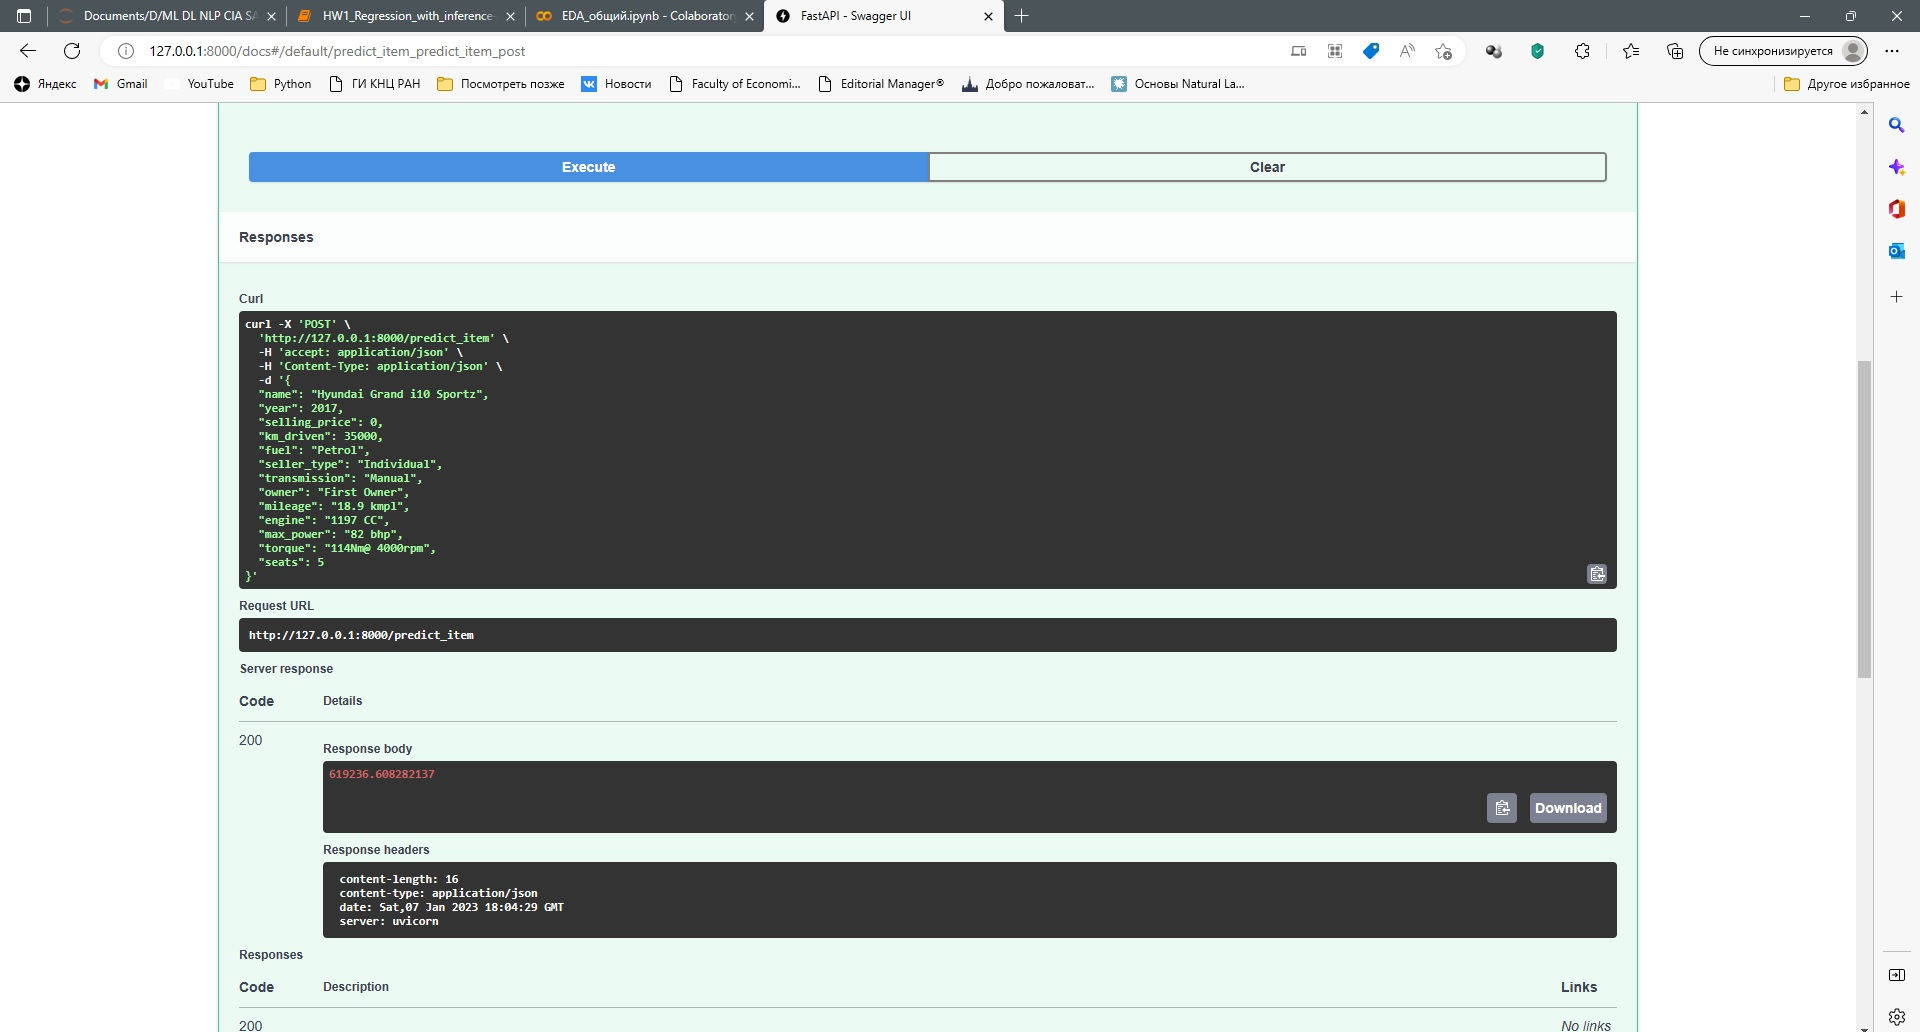

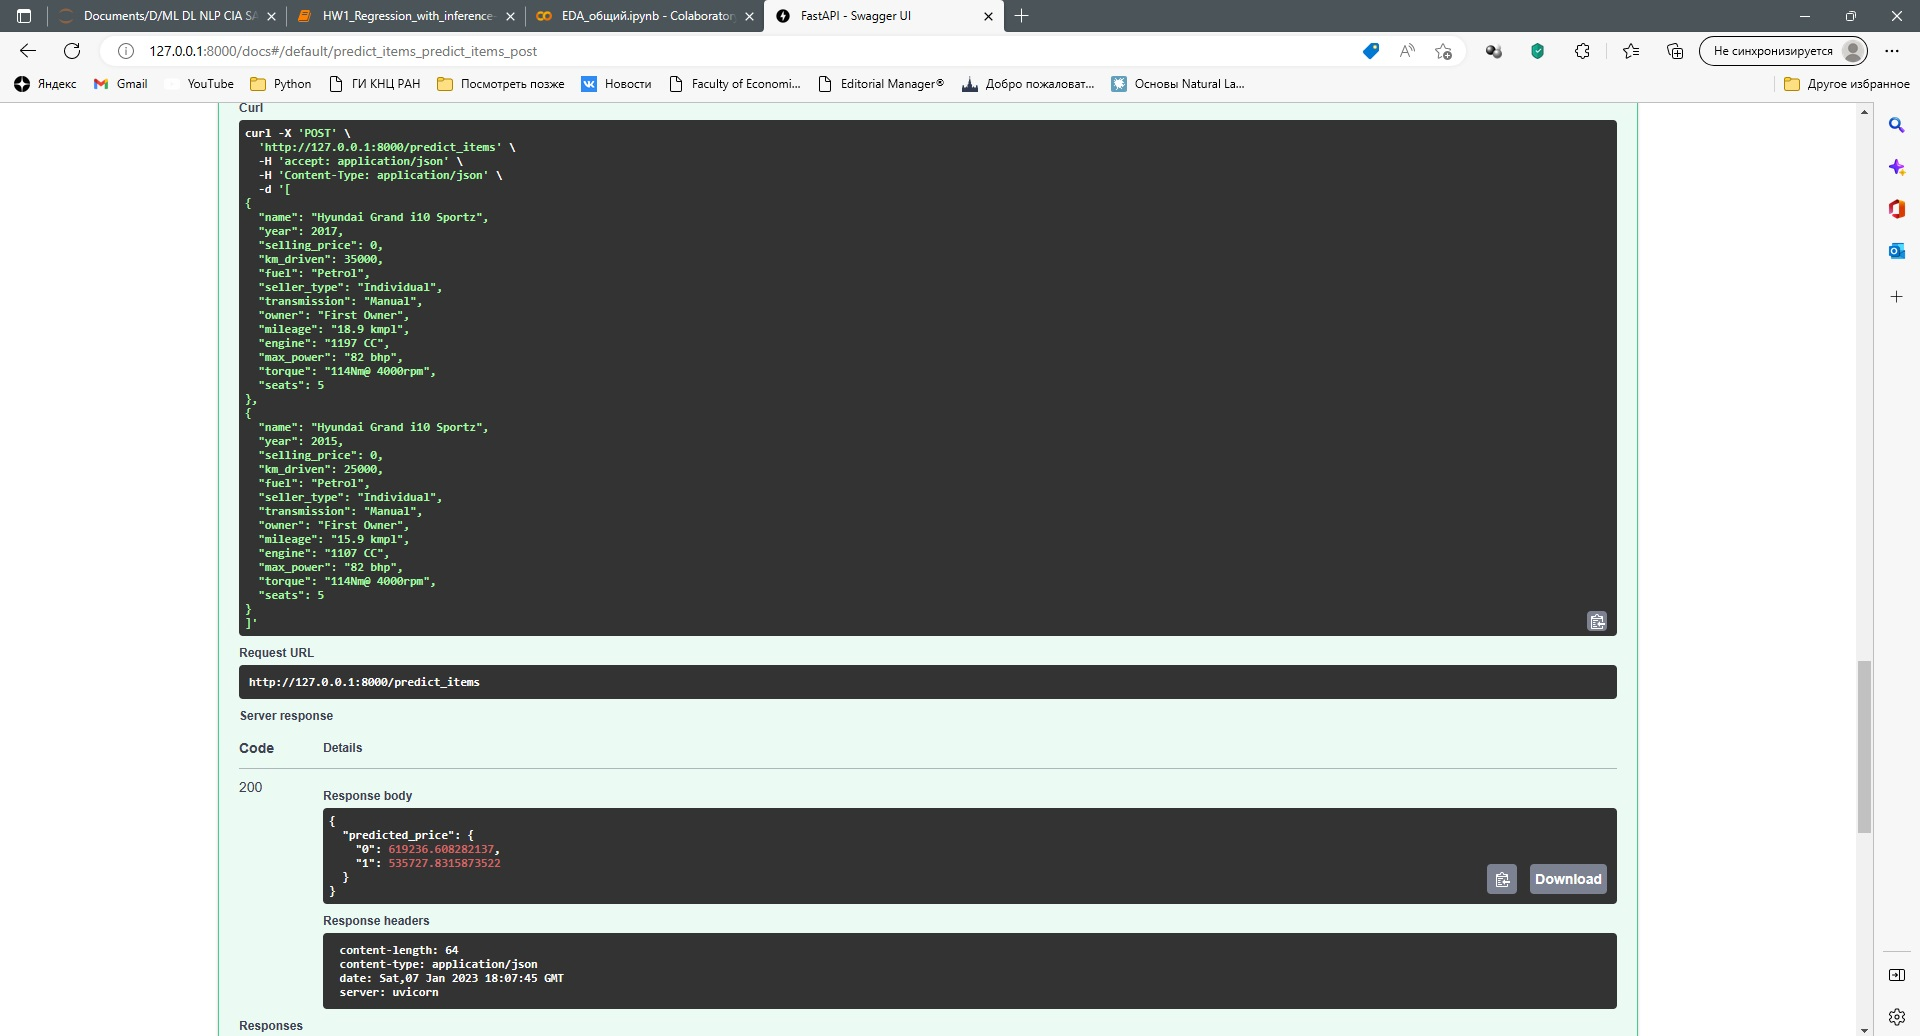

Сохраним веса лучшей модели:

In [ ]:
import pickle
with open('linear_regression.pkl', 'wb') as f:
    pickle.dump(LR_scal, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f, protocol=pickle.HIGHEST_PROTOCOL)

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link